In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('./BalancedDataset/overSampledBalanced.csv')

In [4]:
# 1. Basic Information
print("===== Dataset Information =====")
print(df.info())  # Data types and non-null counts


===== Dataset Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488310 entries, 0 to 5488309
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      int64  
 1   Source IP                    int64  
 2   Source Port                  int64  
 3   Destination IP               int64  
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    int64  
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet

In [5]:
print("\n===== First 5 Rows =====")
print(df.head())  # Display first 5 rows


===== First 5 Rows =====
   Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0    11562       1495        51326            2560                22   
1   137032        769        57636            1409               443   
2    29385       2257        55054            2217               443   
3   218300       2209        56619            8279                80   
4     4347        845        48636            1601                80   

   Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0         6        300             48                  1   
1         6         55             54                  1   
2         6      14820        4832115                  5   
3         6        270       10167694                  8   
4         6        207        5227344                  3   

   Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
0                       1  ...          0.0         0.0         0.0   
1                       1  ...        

In [6]:
print("\n===== Last 5 Rows =====")
print(df.tail())  # Display last 5 rows



===== Last 5 Rows =====
         Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
5488305     9289       1495        46748            2560                22   
5488306    24126       1541        49786            2610                80   
5488307   193127       1155        62205            1407                53   
5488308    98991       1345         2107            1920              8080   
5488309    59949       2198        55780            7309                80   

         Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
5488305         6        253       10423379                 19   
5488306         6         60           6982                  6   
5488307        17        106          60350                  4   
5488308         6         13          79451                  4   
5488309         6         25       20238518                  5   

         Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
5488305                      31 

In [7]:
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")  # Dataset dimensions


===== Dataset Shape =====
Rows: 5488310, Columns: 85


In [8]:
# 2. Handle Missing Values
print("\n===== Missing Values =====")
print(df.isnull().sum().to_string())  # Count of missing values in each column


===== Missing Values =====
Flow ID                        0
Source IP                      0
Source Port                    0
Destination IP                 0
Destination Port               0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max    

In [9]:

# Fill missing values (if necessary)
# df.fillna(method='ffill', inplace=True)  # Forward fill
# df.fillna(method='bfill', inplace=True)  # Backward fill
# df.fillna(df.mean(), inplace=True)  # Fill with mean (for numerical columns)


In [10]:

# 3. Statistical Summary
print("\n===== Statistical Summary =====")
print(df.describe())  # Summary statistics for numerical columns



===== Statistical Summary =====
            Flow ID     Source IP   Source Port  Destination IP  \
count  5.488310e+06  5.488310e+06  5.488310e+06    5.488310e+06   
mean   6.393855e+04  1.619953e+03  4.110328e+04    2.354116e+03   
std    6.479054e+04  8.267827e+02  2.048715e+04    1.225368e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
25%    1.597100e+04  1.267000e+03  3.464600e+04    1.601000e+03   
50%    3.198900e+04  1.541000e+03  4.963100e+04    2.558000e+03   
75%    9.634000e+04  2.142000e+03  5.524800e+04    2.610000e+03   
max    2.492120e+05  8.238000e+03  6.553500e+04    9.697000e+03   

       Destination Port      Protocol     Timestamp  Flow Duration  \
count      5.488310e+06  5.488310e+06  5.488310e+06   5.488310e+06   
mean       6.020964e+03  8.216347e+00  1.450451e+03   1.711861e+07   
std        1.574153e+04  4.416331e+00  4.550171e+03   3.442935e+07   
min        0.000000e+00  0.000000e+00  0.000000e+00  -1.300000e+01   
25%        5.

In [11]:
print("\n===== Categorical Summary =====")
print(df.describe(include=['object']))  # Summary for categorical columns


===== Categorical Summary =====
          Label
count   5488310
unique       15
top      BENIGN
freq    2607703


In [12]:

# 4. Unique Values in Categorical Columns
print("\n===== Unique Values in Categorical Columns =====")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


===== Unique Values in Categorical Columns =====
Label: 15 unique values



===== Distribution of Numerical Features =====


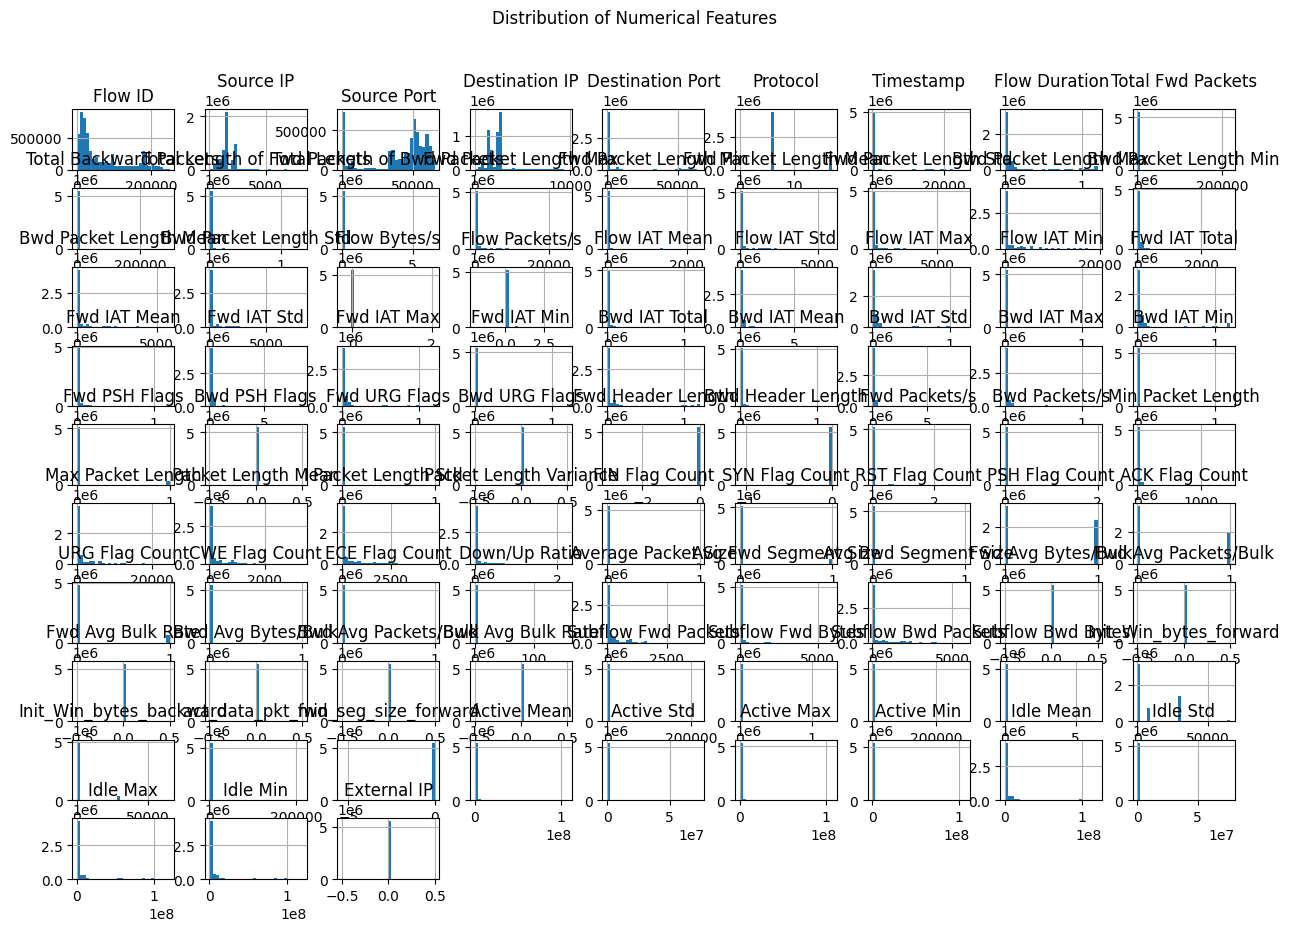

In [13]:
# 5. Distribution of Numerical Features
print("\n===== Distribution of Numerical Features =====")
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()



===== Distribution of Categorical Features =====


C:\Users\Pratham\AppData\Local\Temp\ipykernel_34340\1376831365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


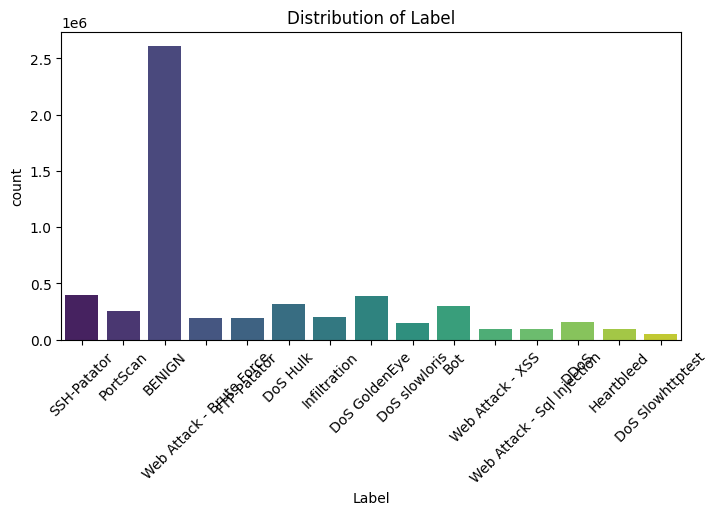

In [14]:

# 6. Distribution of Categorical Features
print("\n===== Distribution of Categorical Features =====")
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



In [15]:
# 7. Outlier Detection (Boxplots)
print("\n===== Outlier Detection (Boxplots) =====")
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette='viridis')
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()



===== Outlier Detection (Boxplots) =====


MemoryError: Unable to allocate 1.64 GiB for an array with shape (40, 5488310) and data type int64

<Figure size 1500x800 with 0 Axes>

In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
df = pd.read_csv('./BalancedDataset/overSampledBalanced.csv')

# Check the unique values in the target column before encoding
print("Unique values in the target column before encoding:")
print(df['Label'].unique())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the target column
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Check the unique values in the target column after encoding
print("\nUnique values in the target column after encoding:")
print(df['Label_Encoded'].unique())

# Display the mapping of original labels to encoded values
print("\nLabel Encoding Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Save the updated dataset (optional)
df.to_csv('./BalancedDataset/labelledOverSampled.csv', index=False)
print("\nDataset with label encoding saved as ./BalancedDataset/labelledOverSampled'")

MemoryError: Unable to allocate 64.0 KiB for an array with shape (8192,) and data type int64

In [ ]:
# import seaborn as sns

# # 9. Pairplot for Numerical Features
# print("\n===== Pairplot for Numerical Features =====")
# sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
# plt.suptitle("Pairplot for Numerical Features", y=1.02)
# plt.show()



===== Target Variable Analysis =====


C:\Users\Pratham\AppData\Local\Temp\ipykernel_23724\605327553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


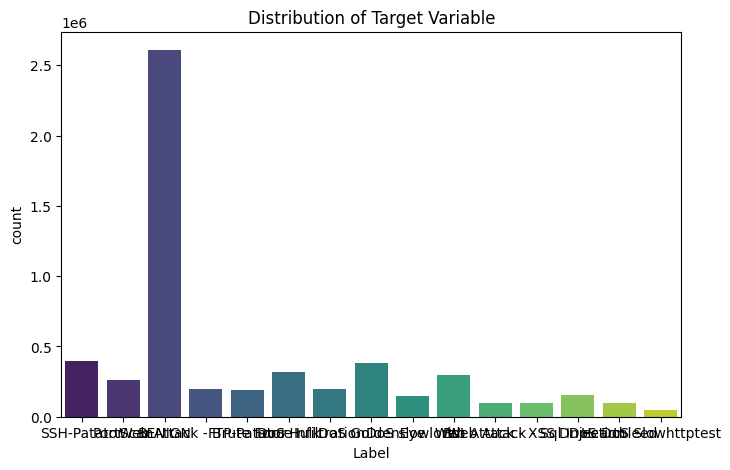

In [4]:
# 10. Target Variable Analysis (if applicable)
if 'Label' in df.columns:
    print("\n===== Target Variable Analysis =====")
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Label', palette='viridis')
    plt.title("Distribution of Target Variable")
    plt.show()




===== Feature Relationships with Target =====


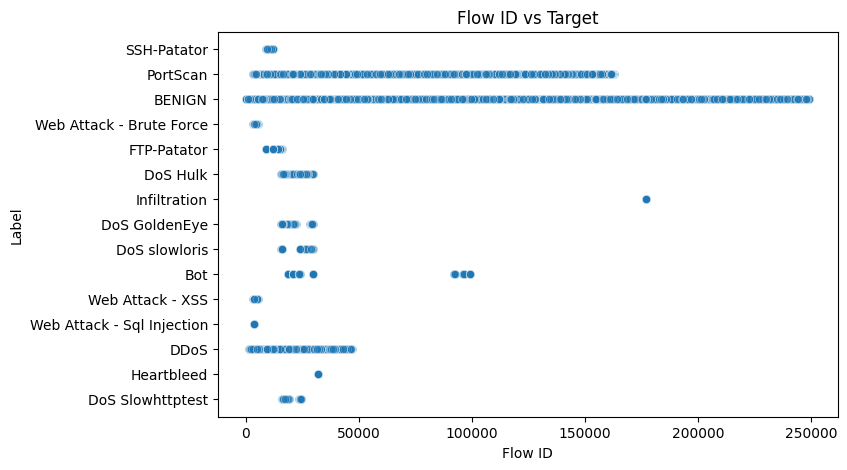

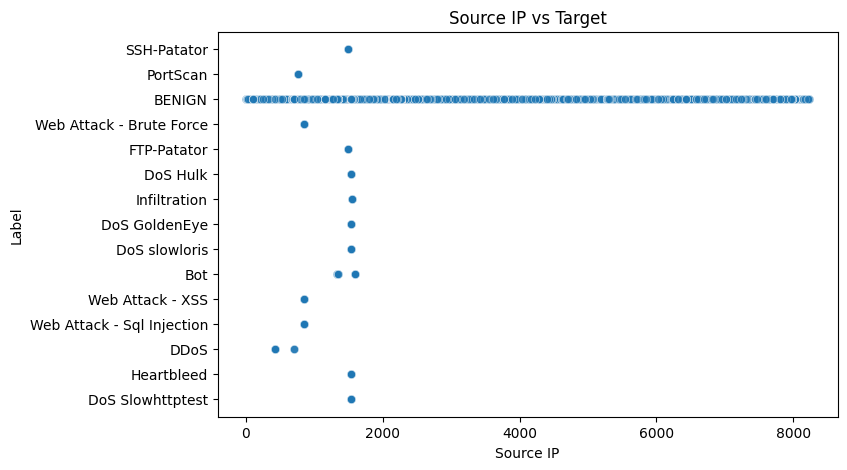

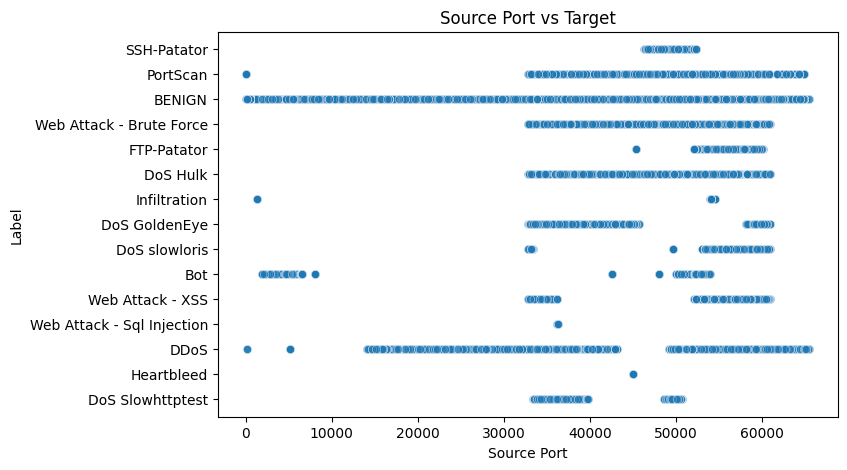

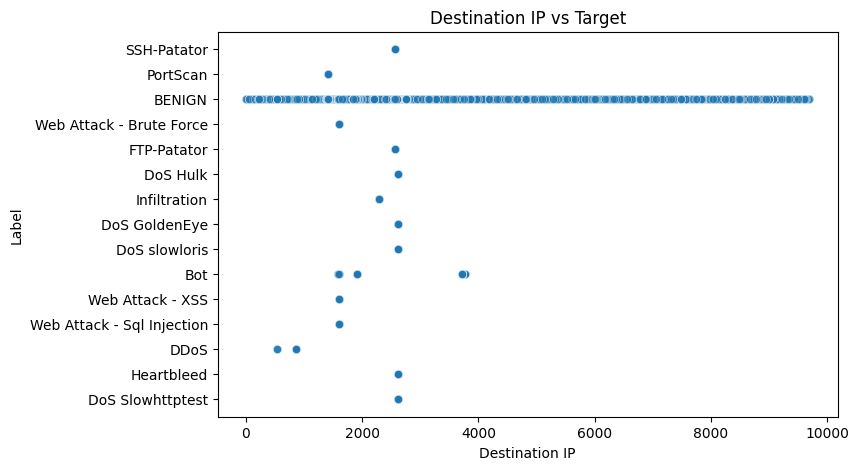

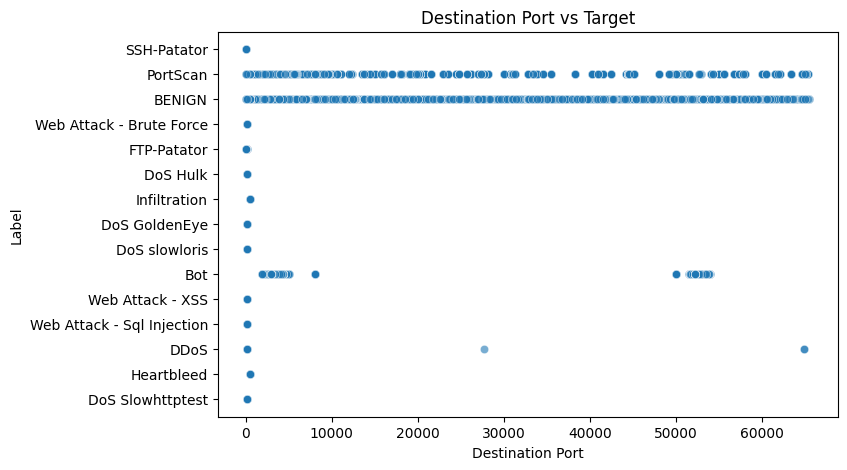

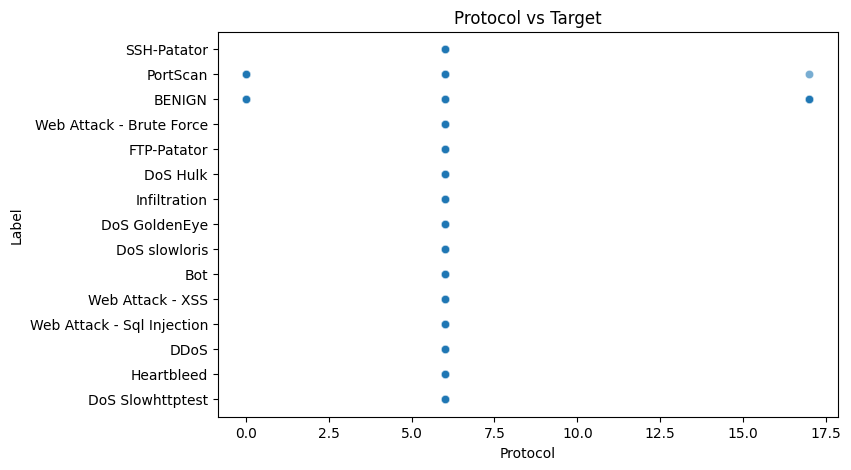

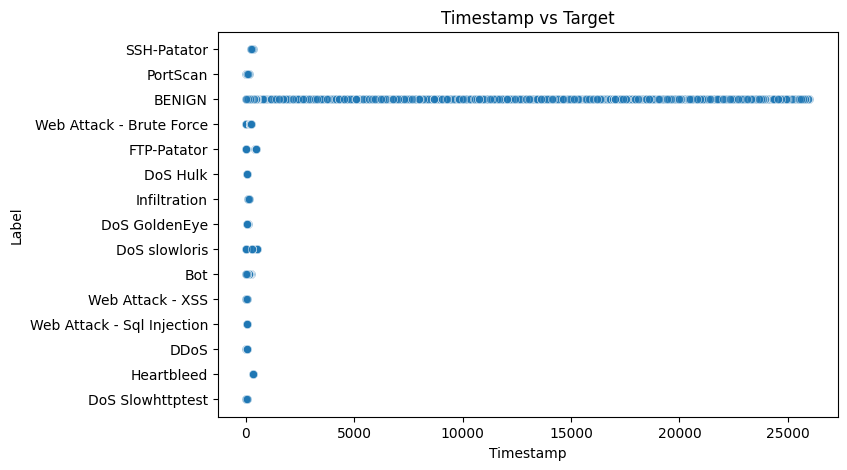

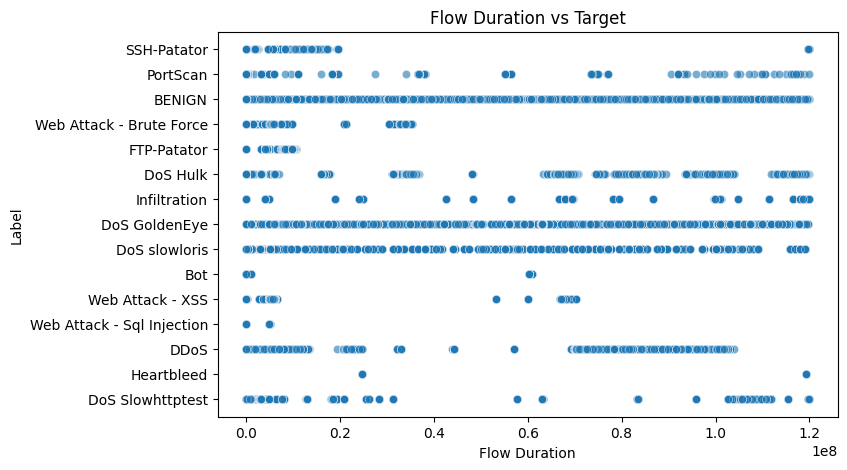

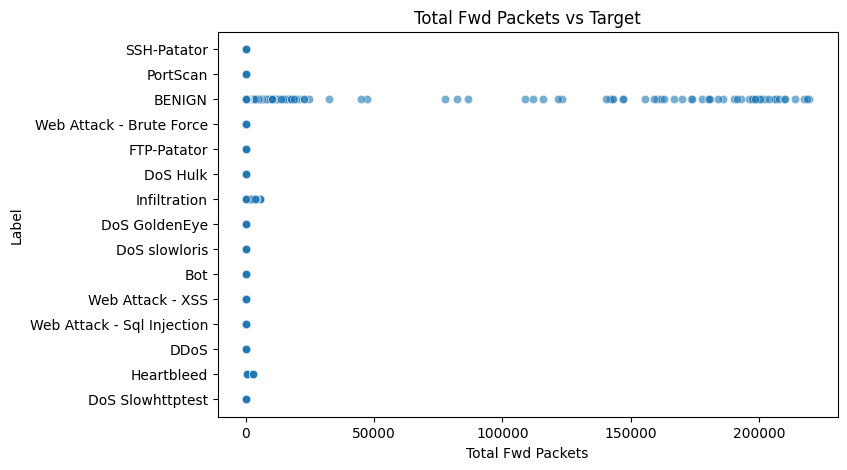

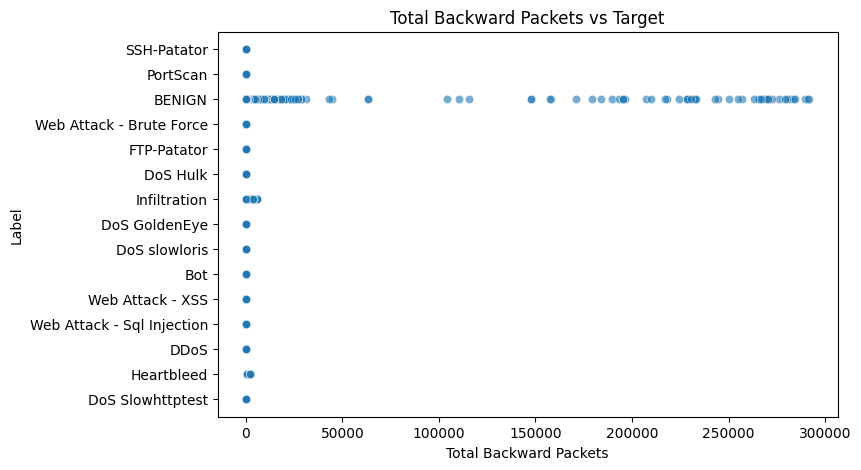

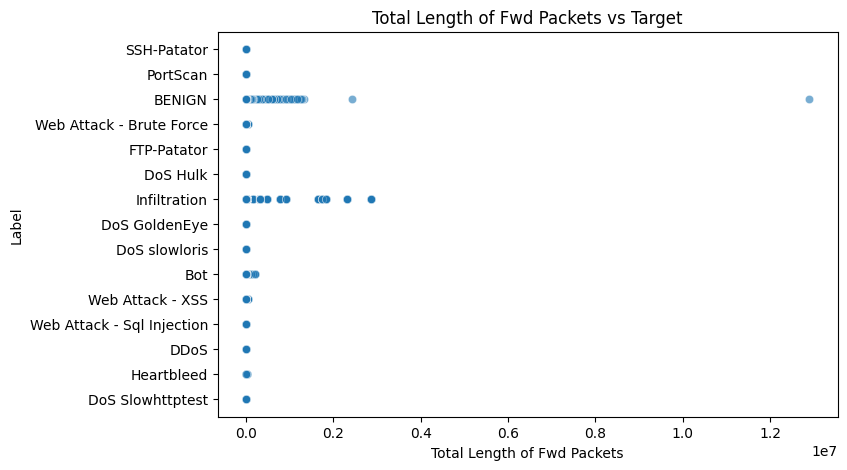

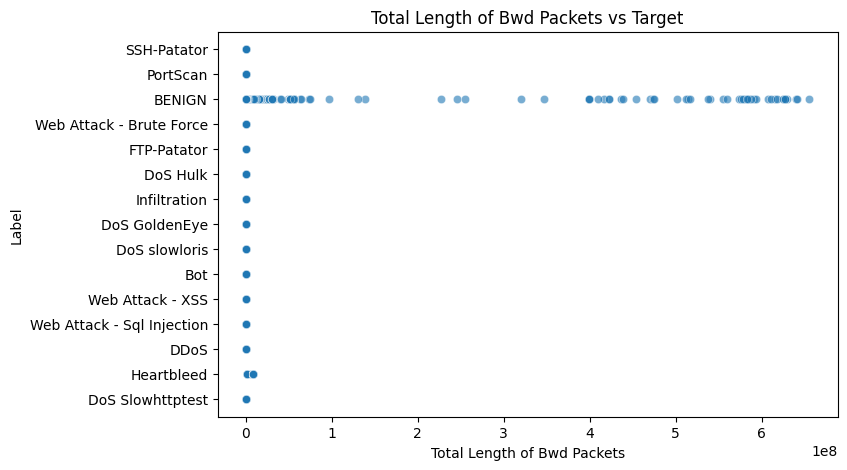

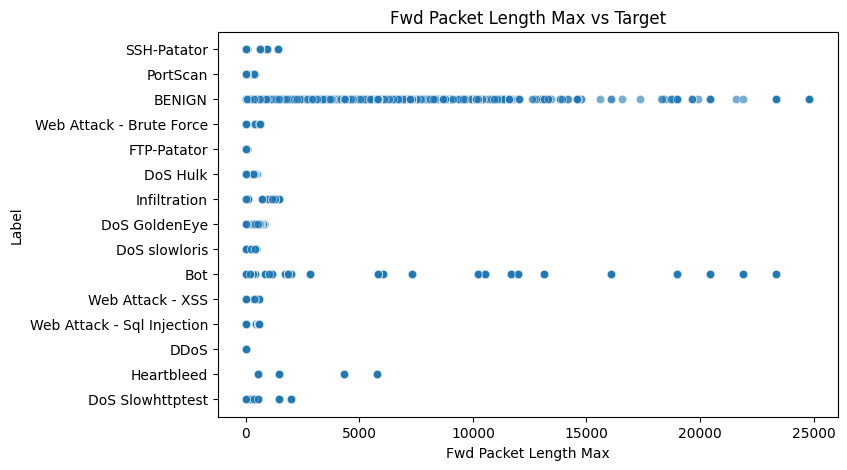

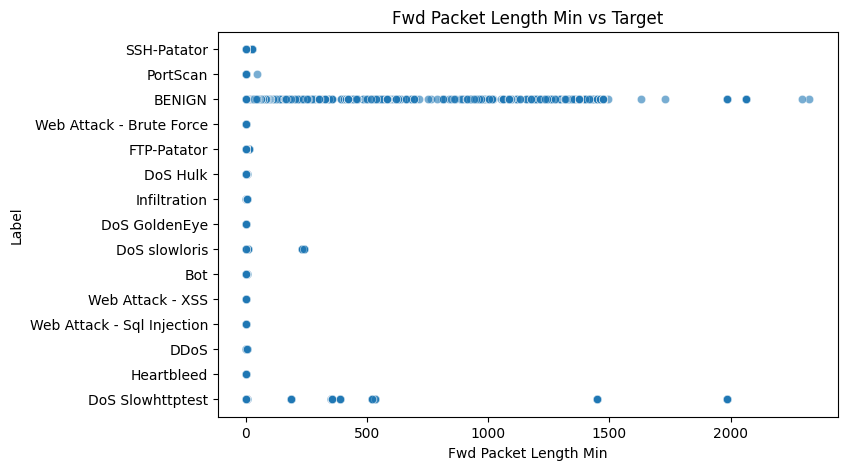

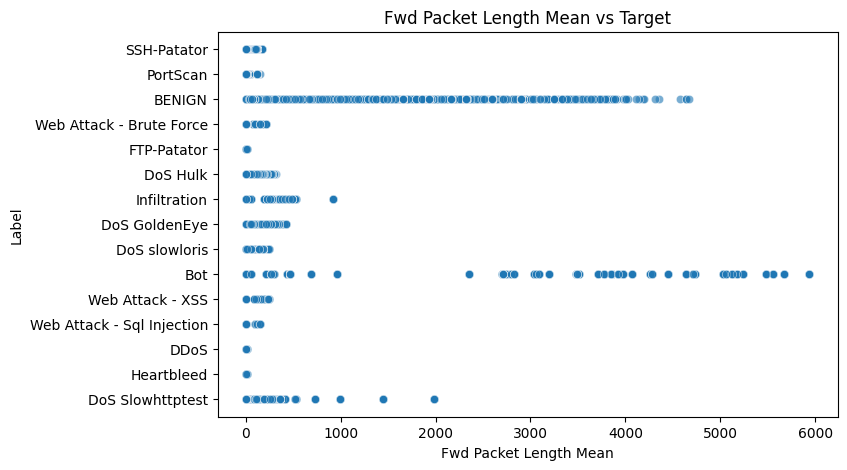

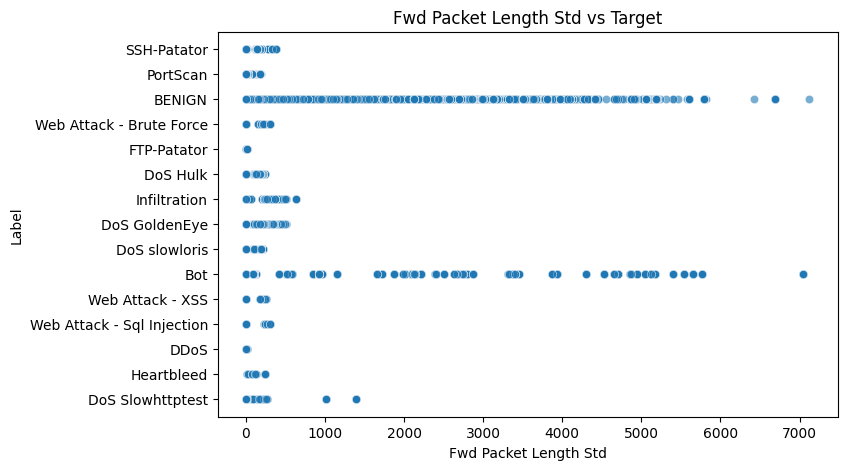

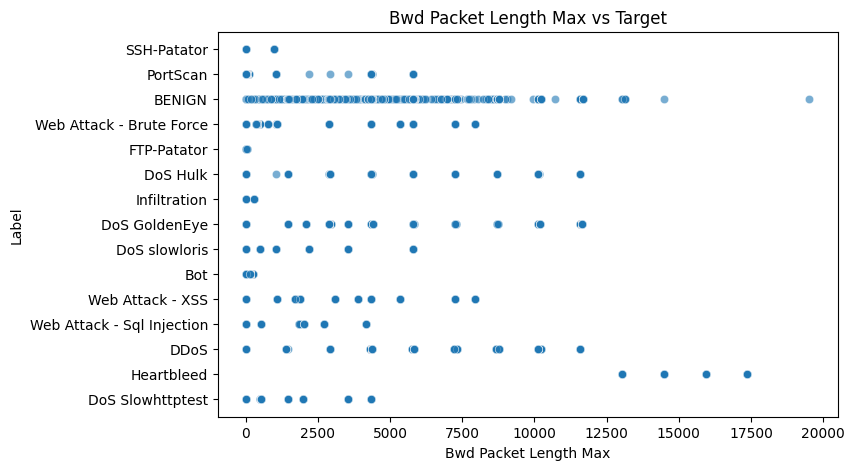

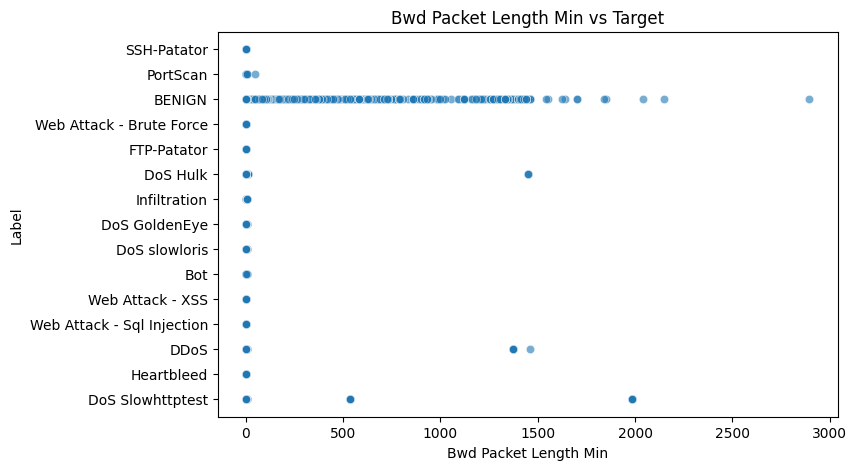

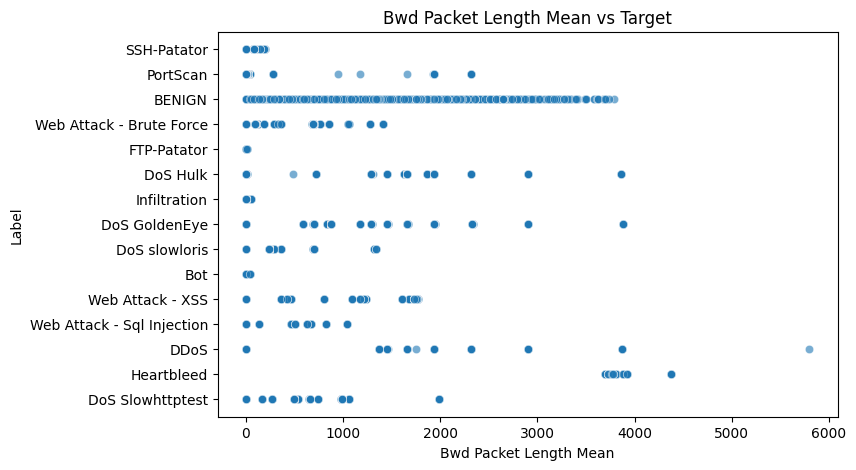

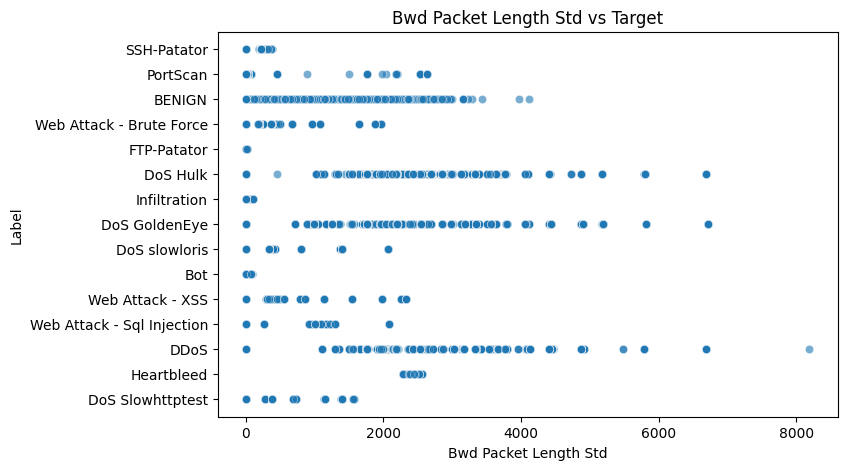

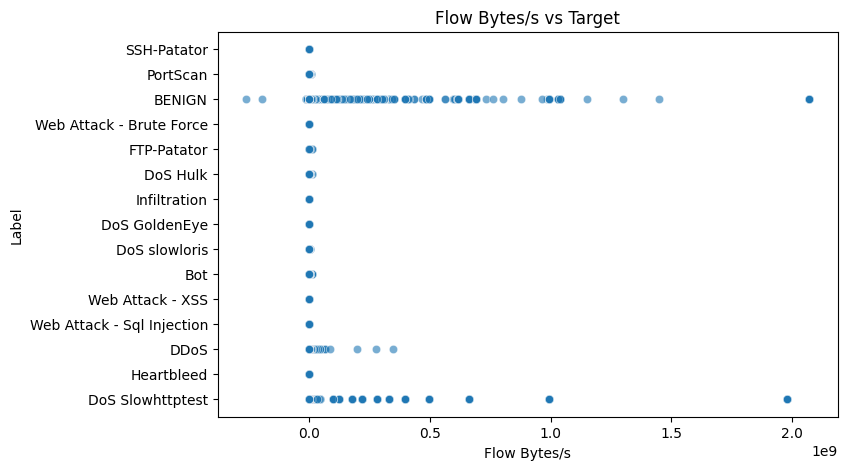

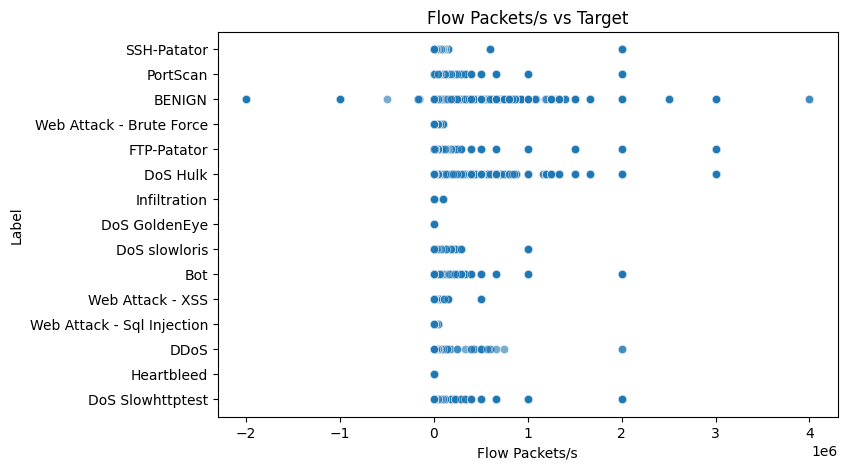

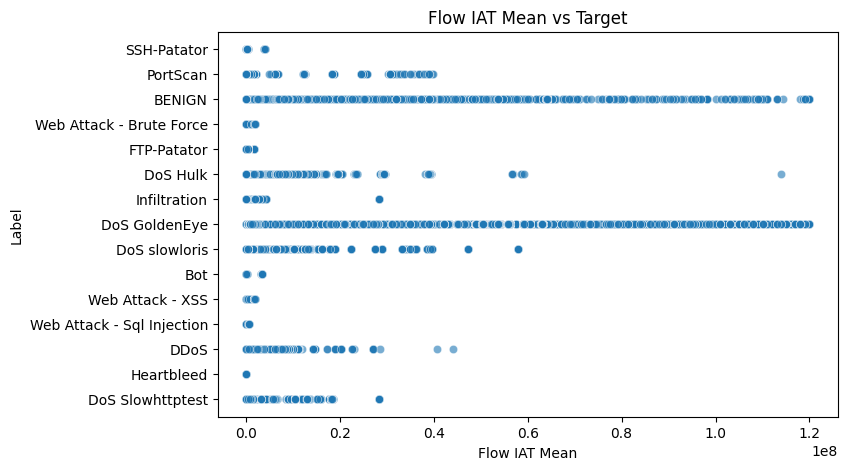

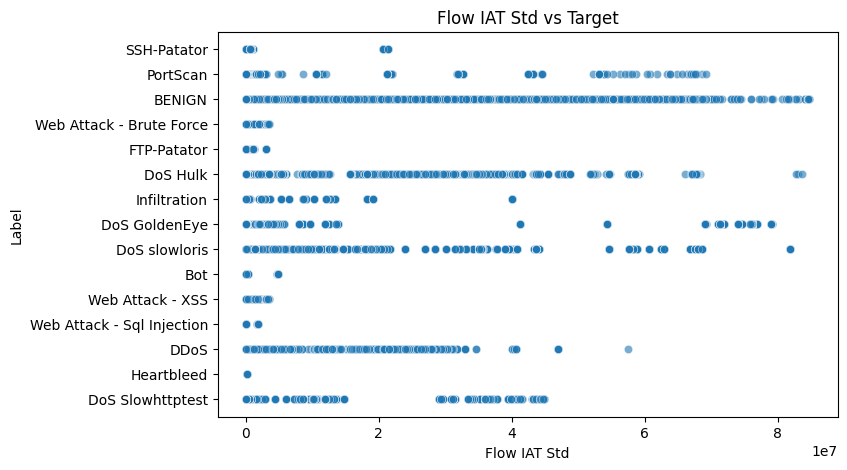

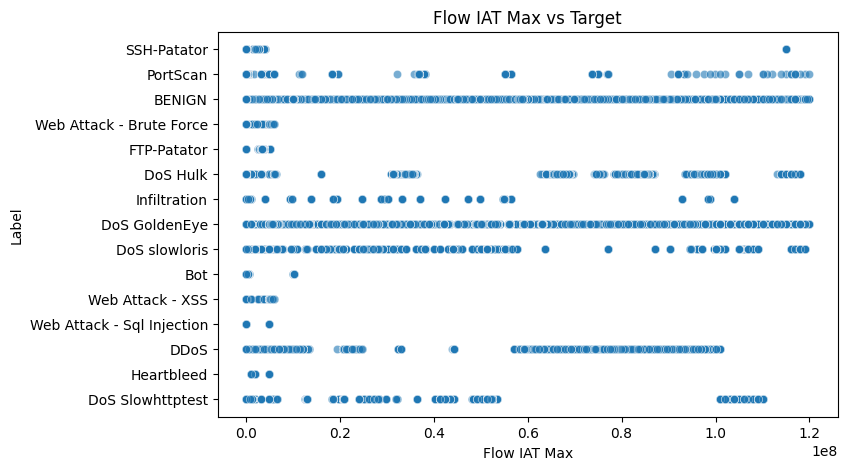

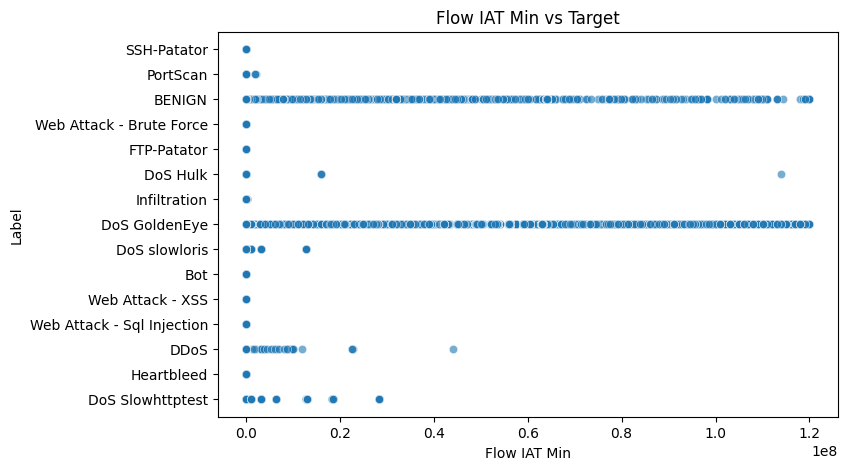

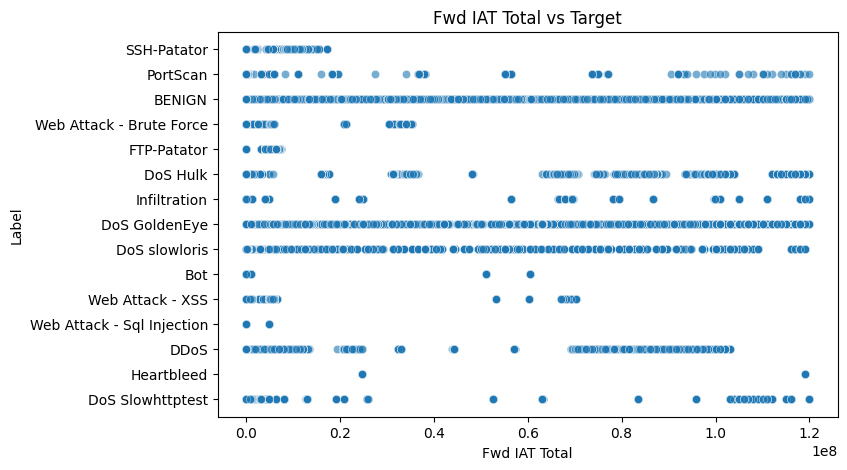

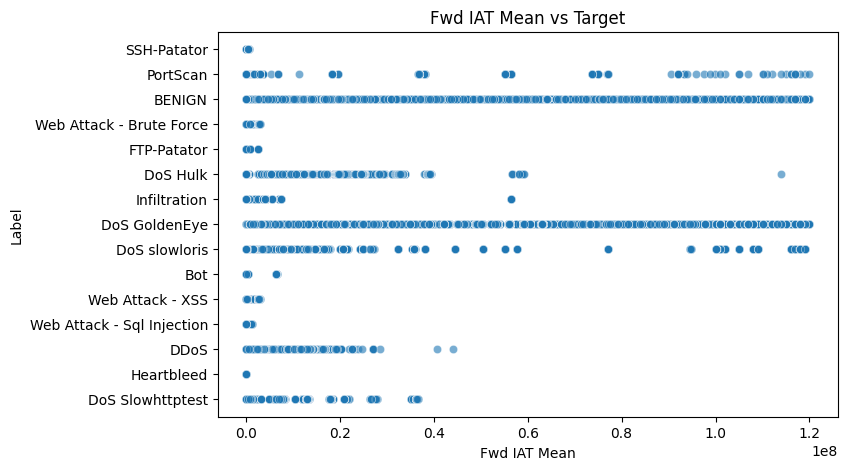

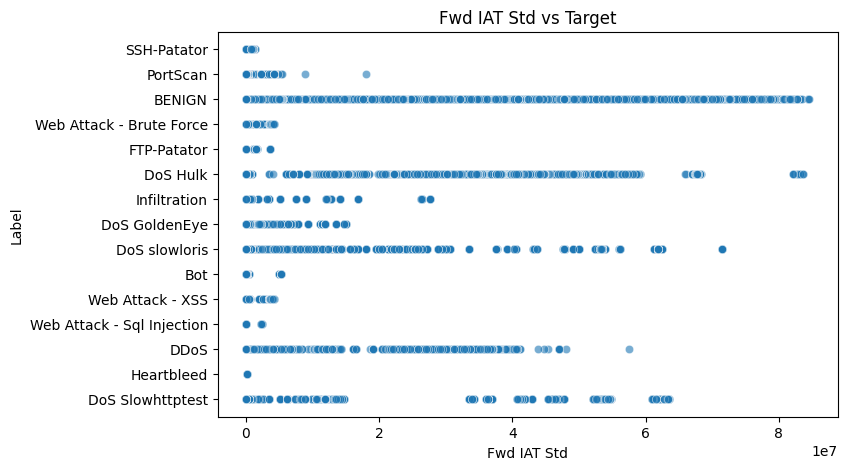

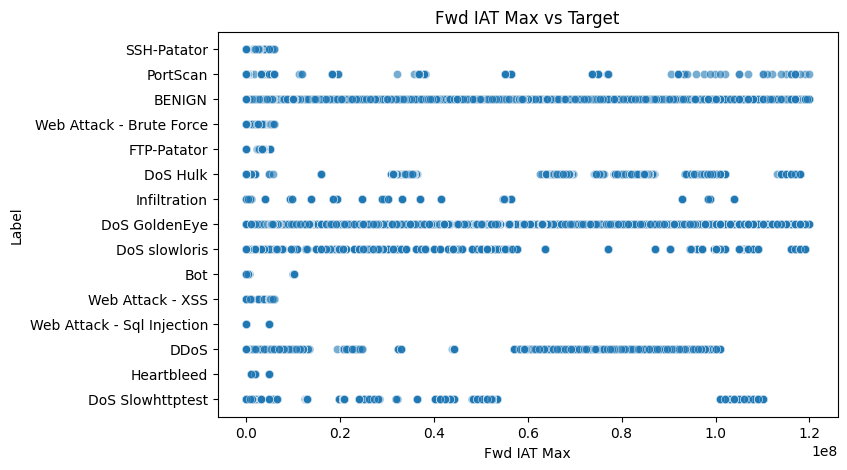

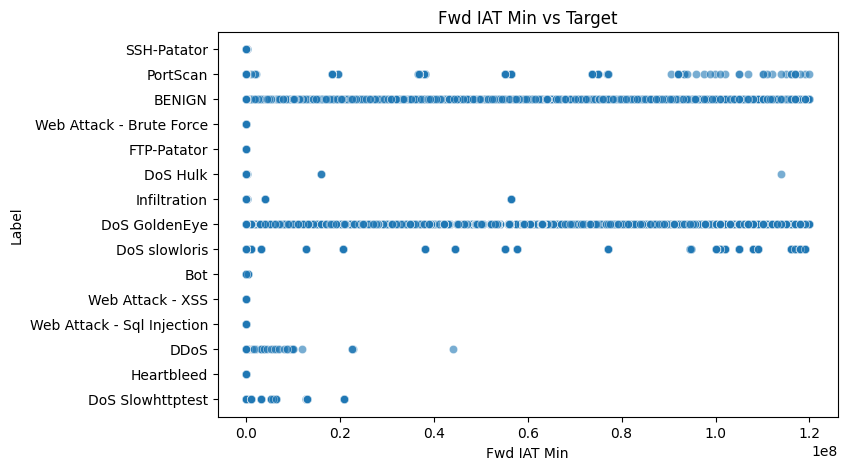

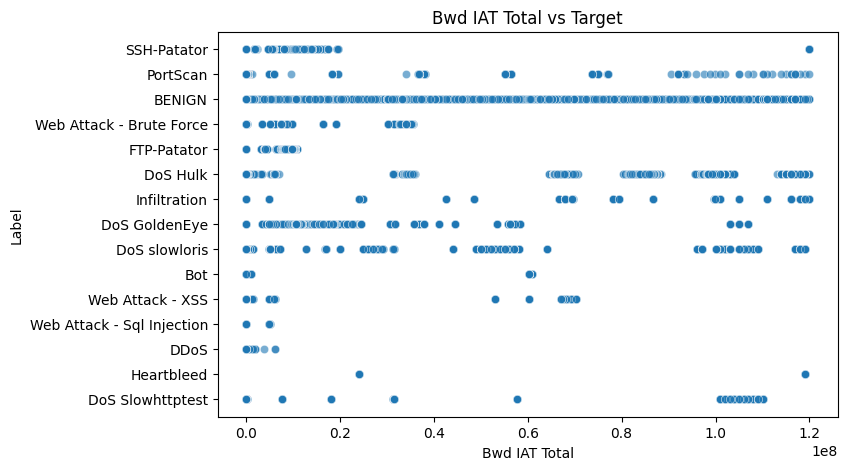

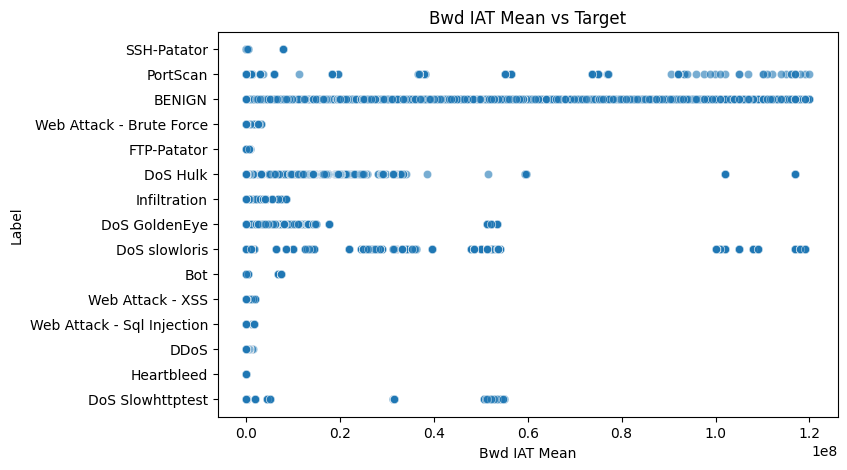

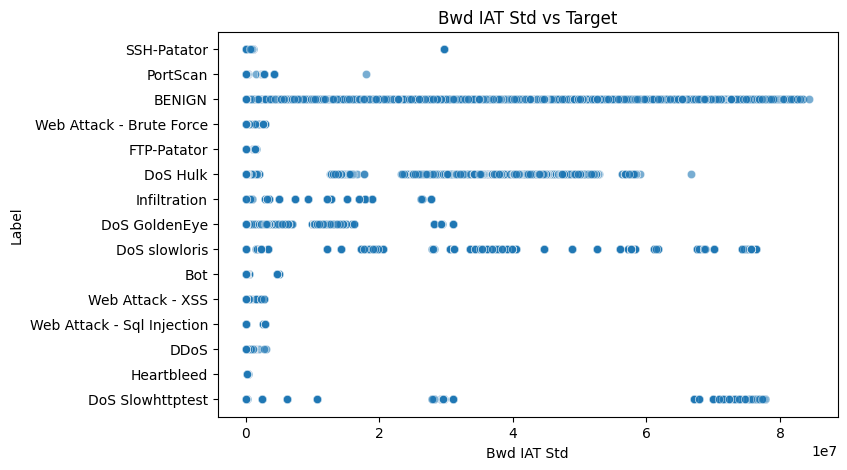

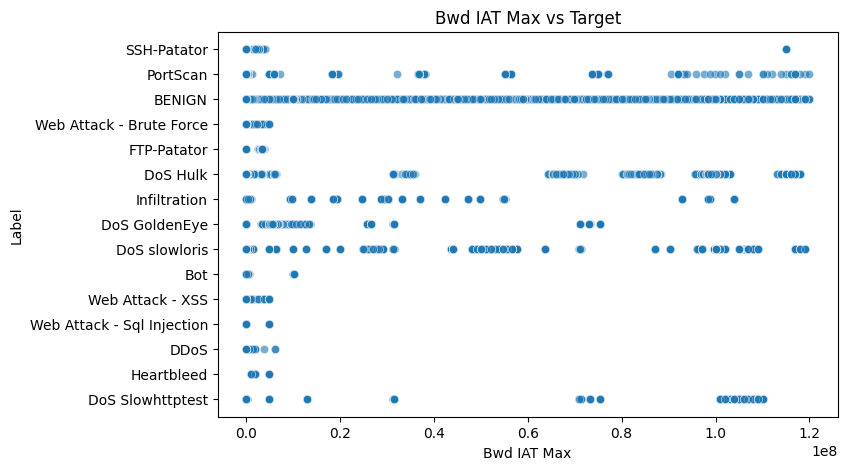

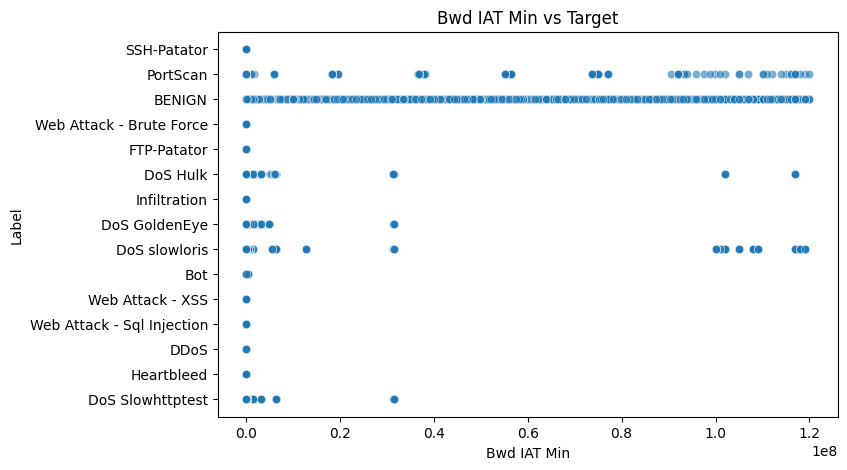

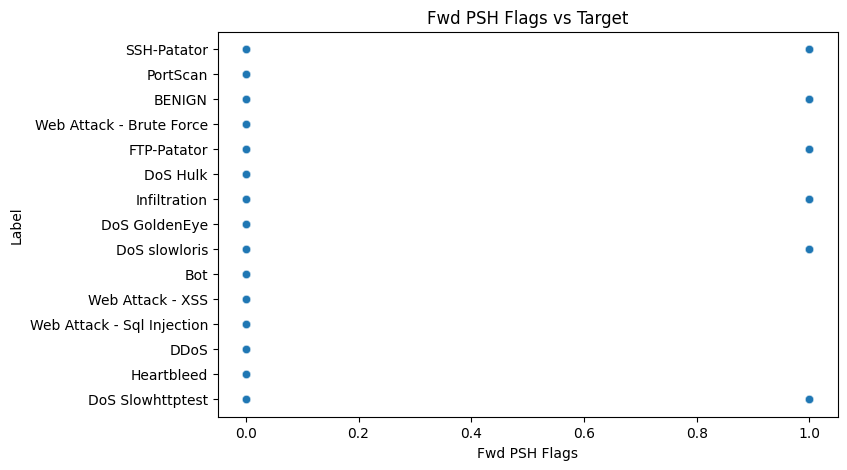

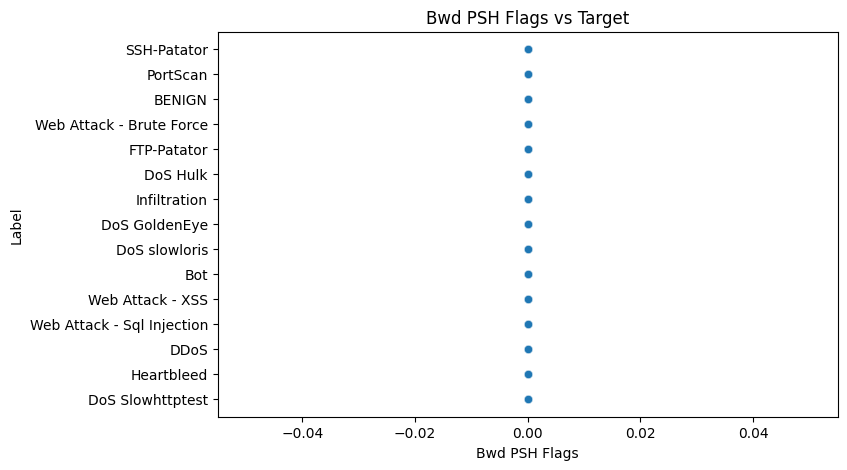

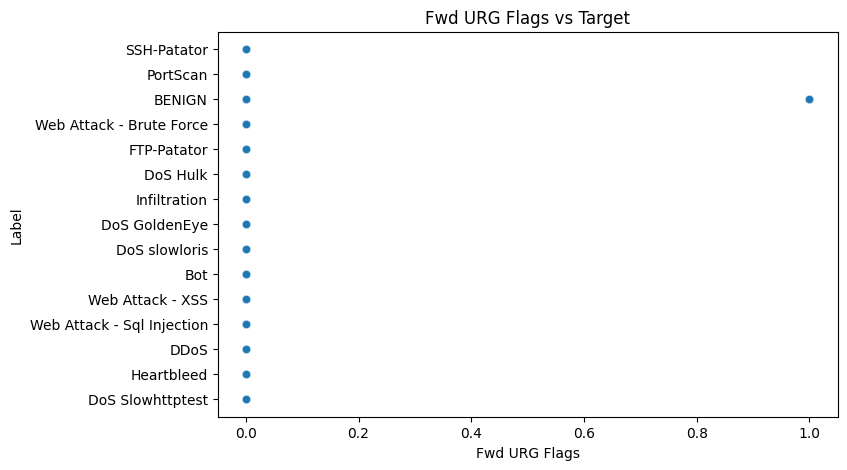

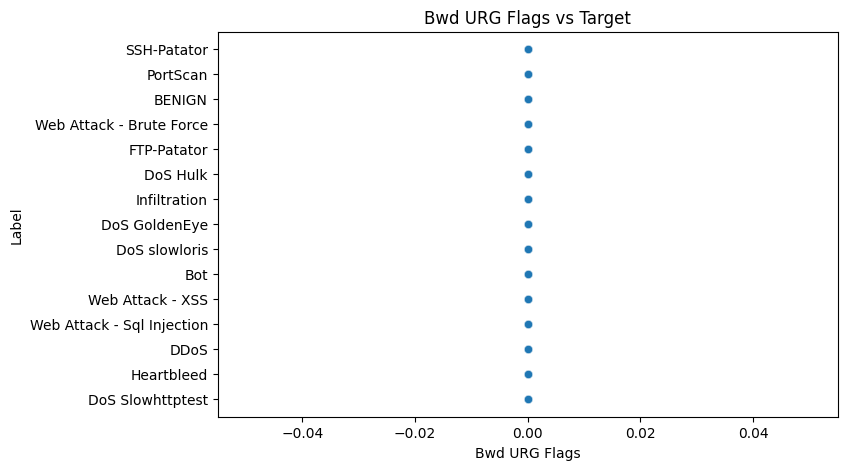

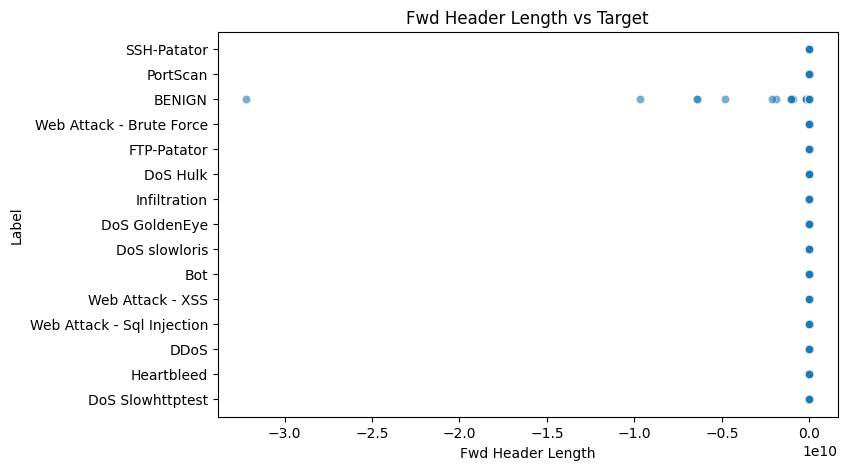

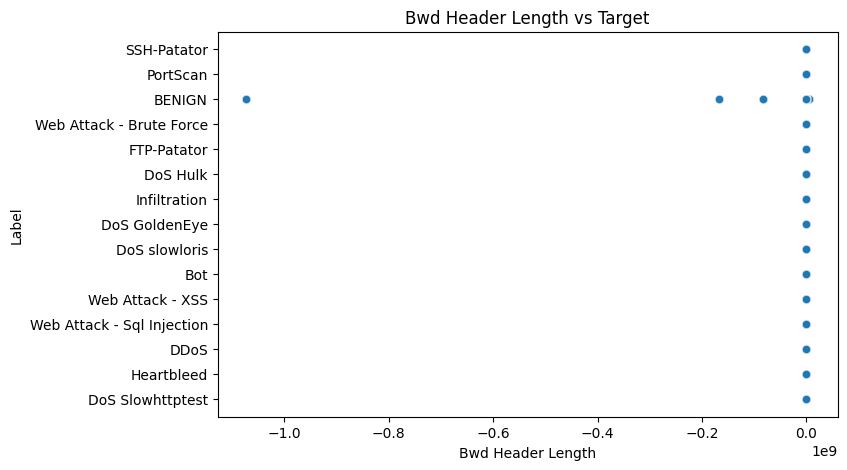

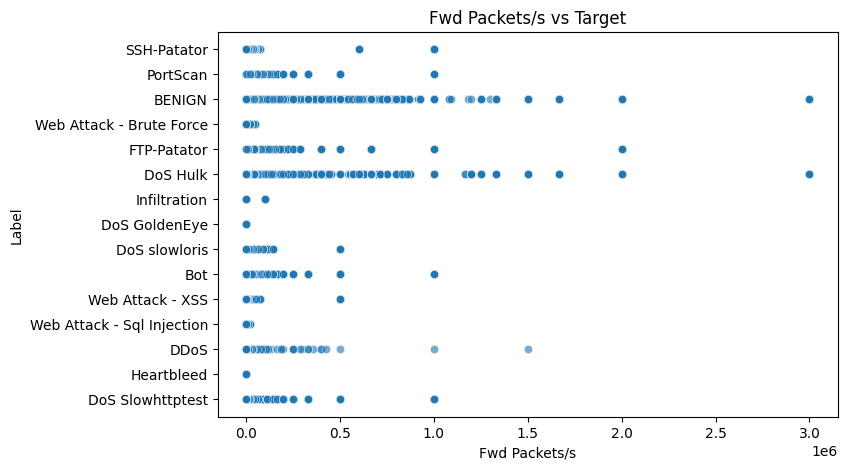

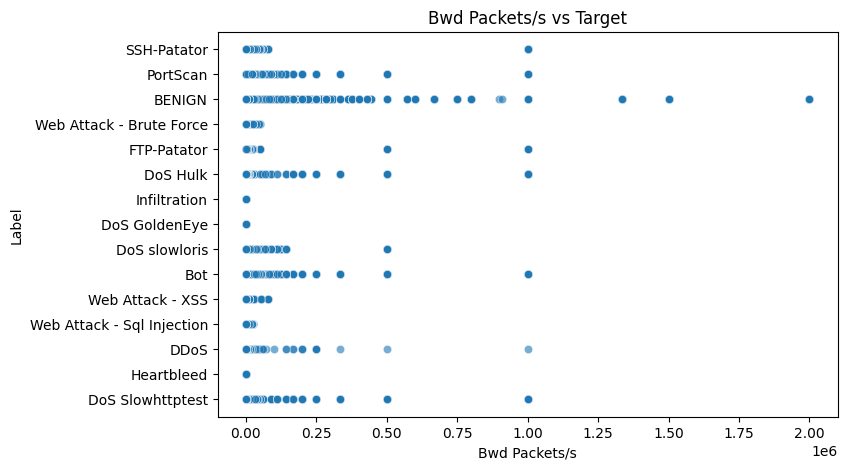

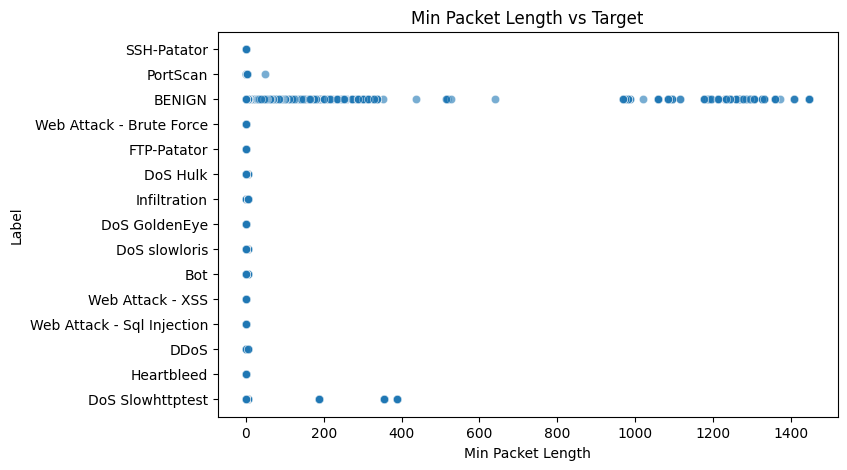

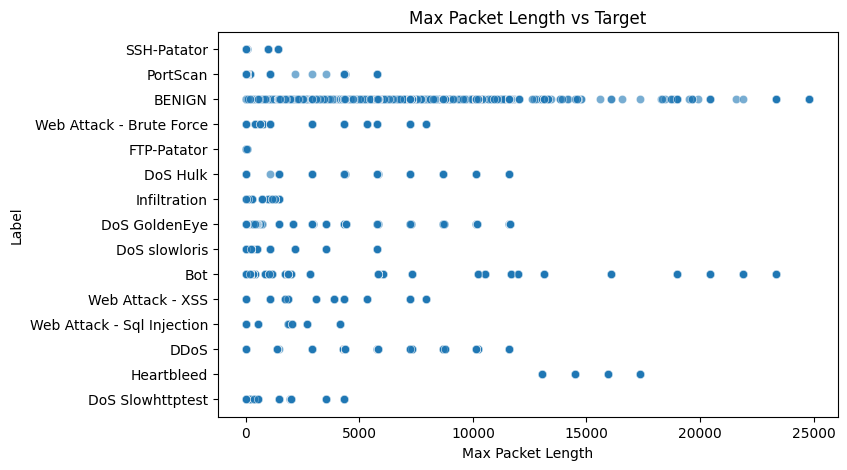

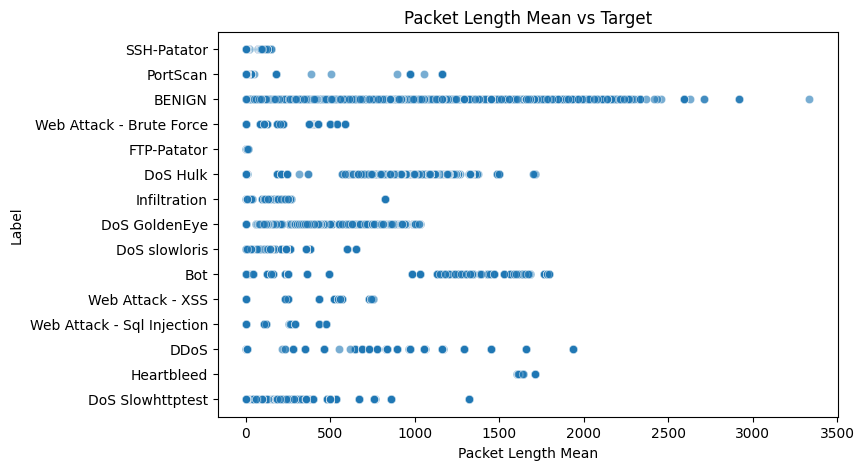

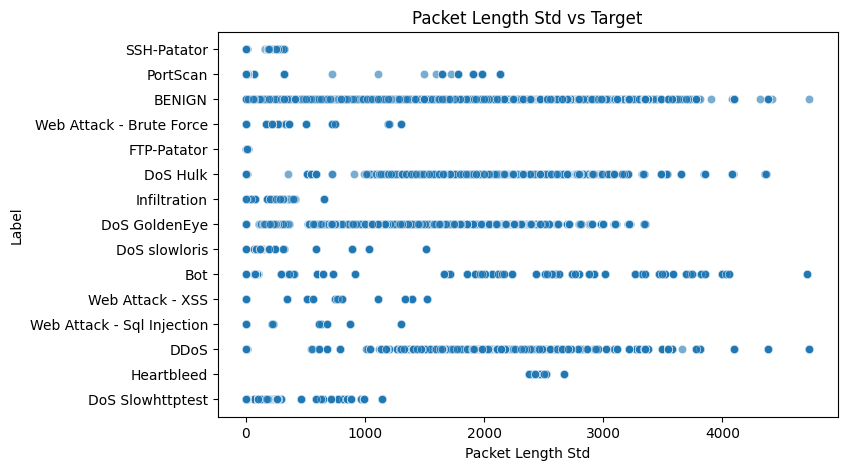

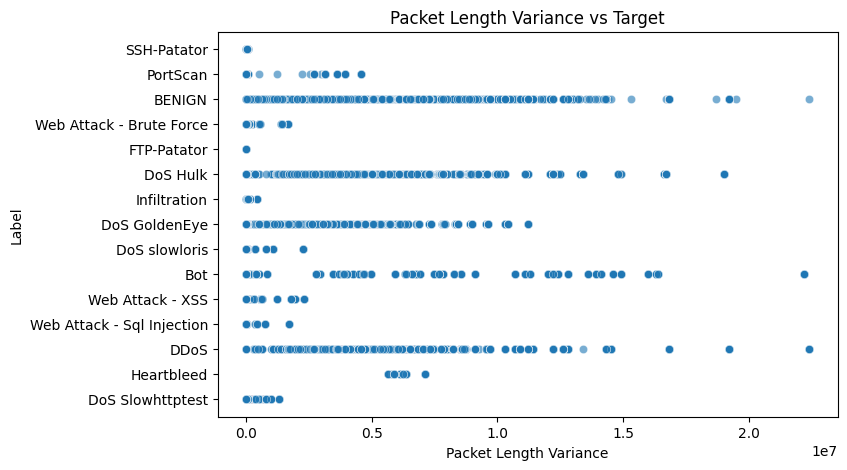

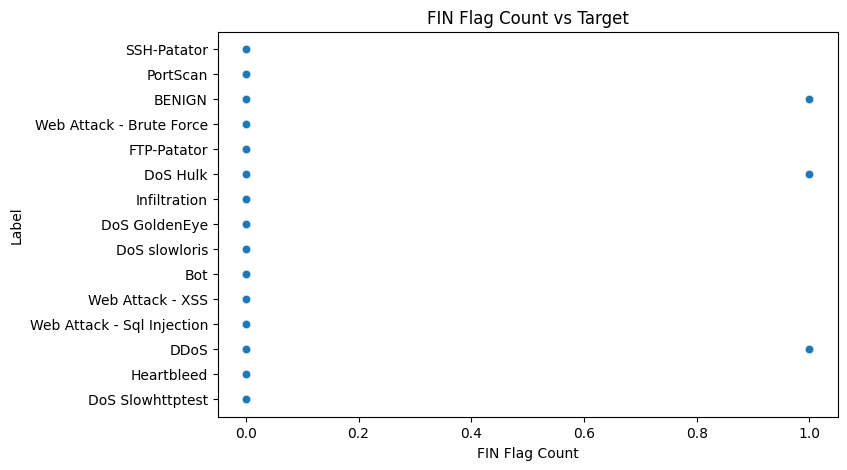

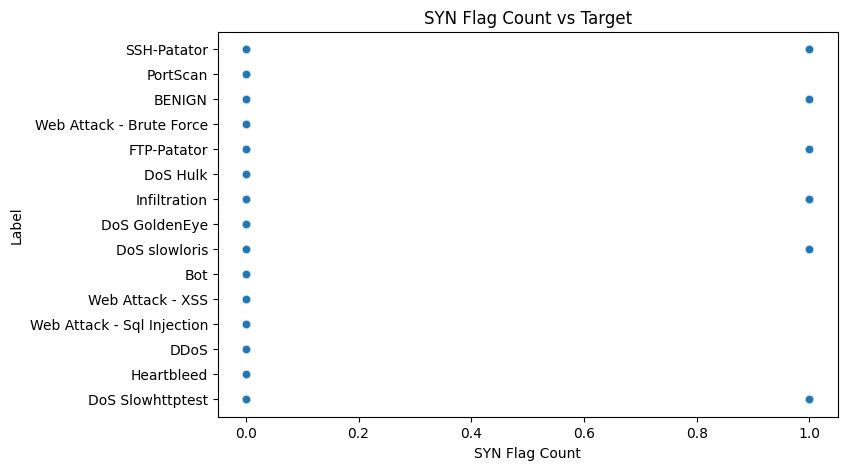

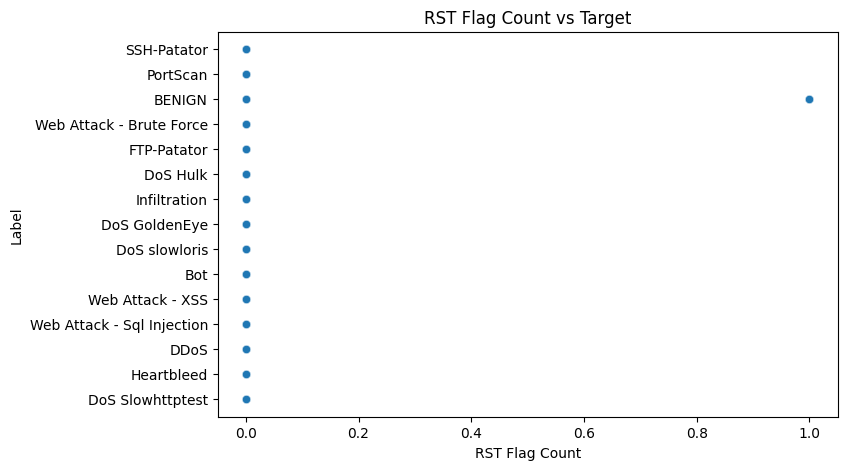

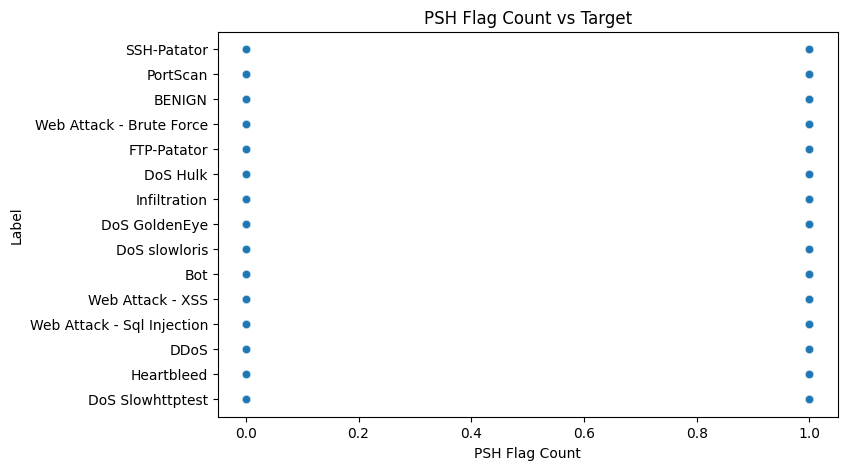

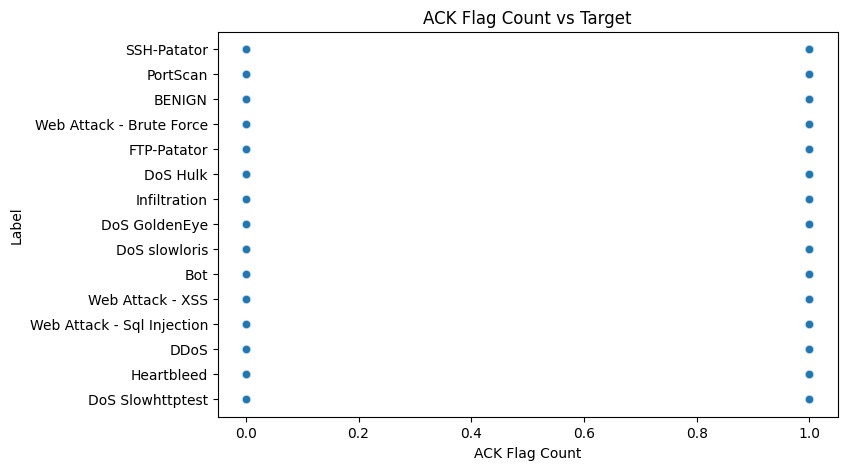

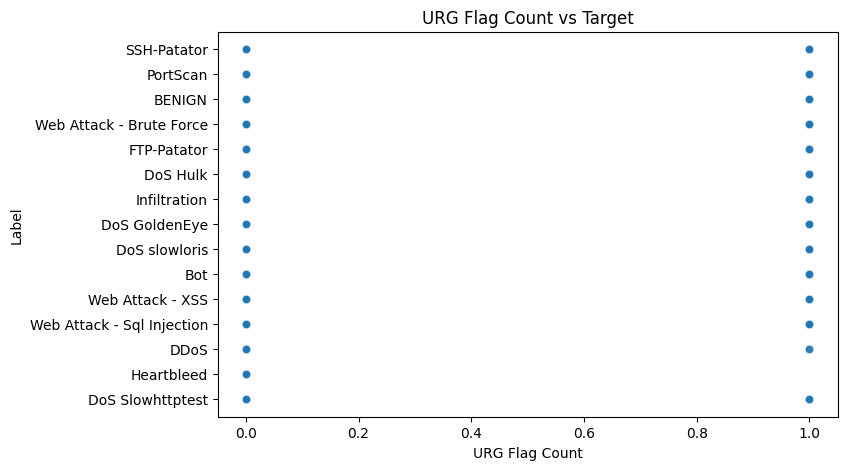

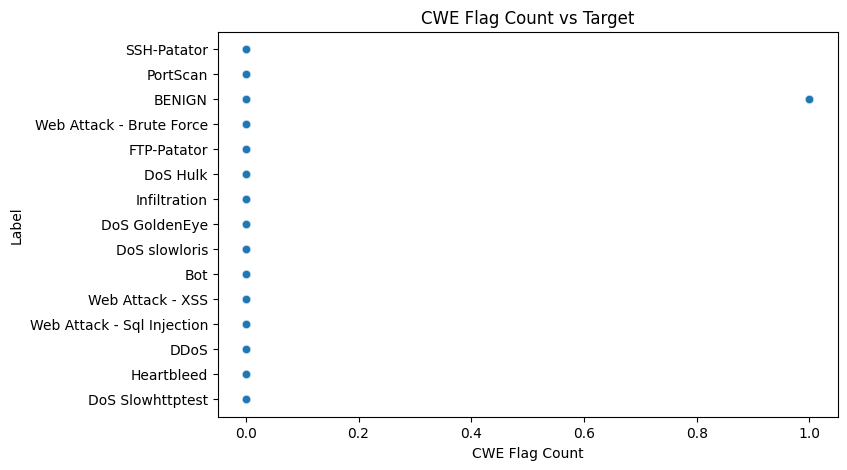

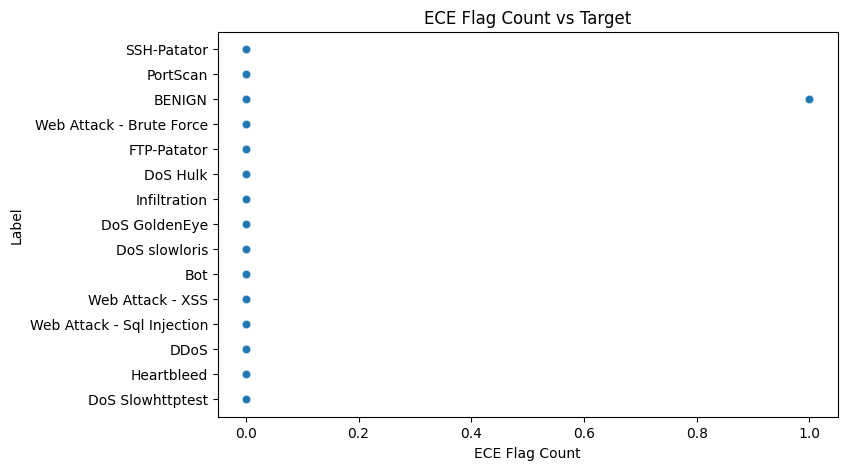

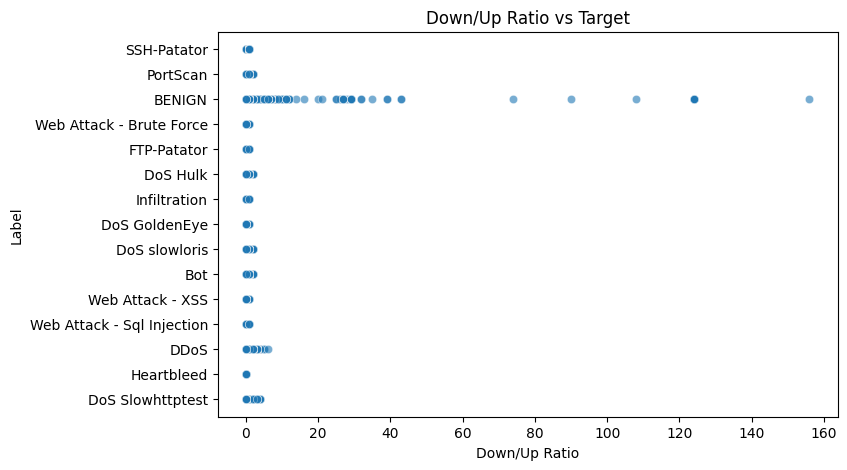

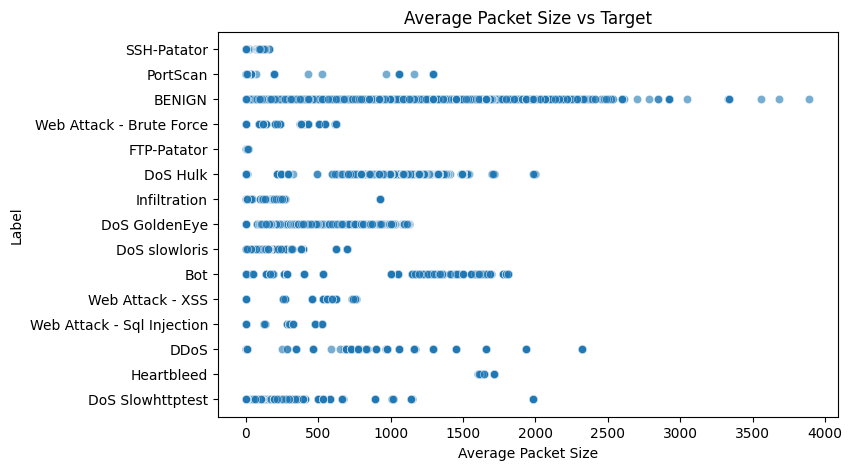

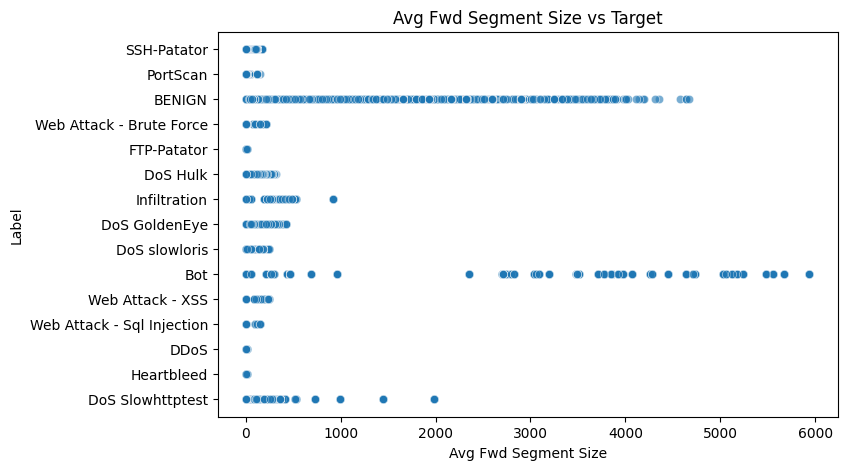

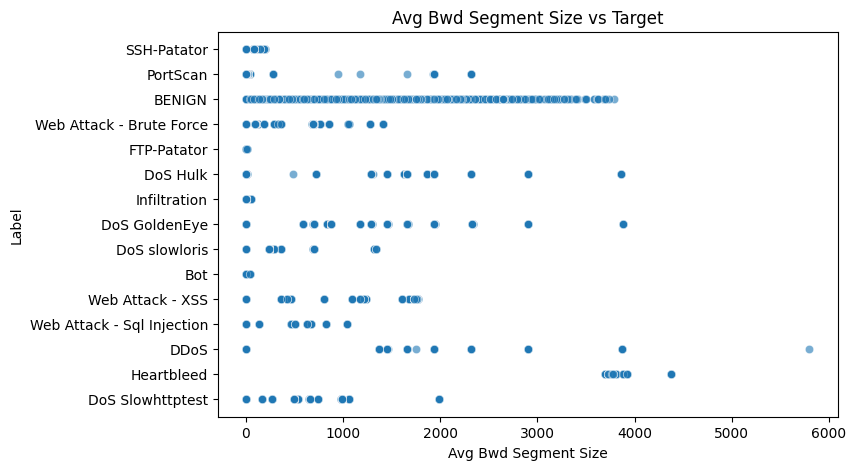

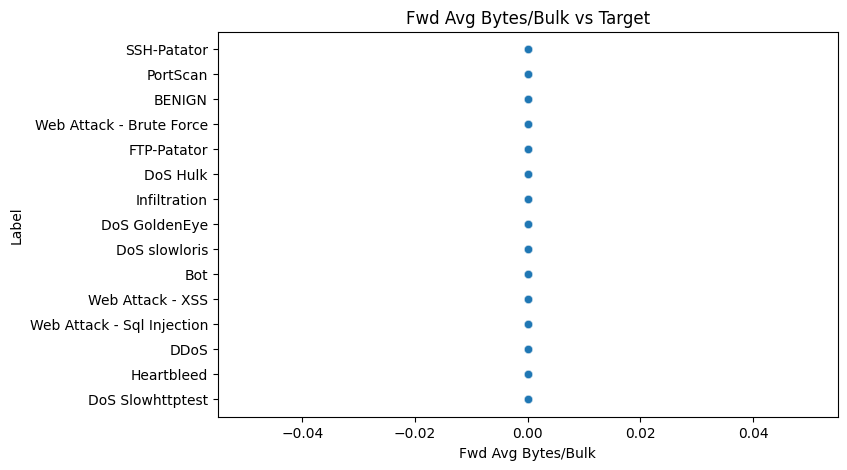

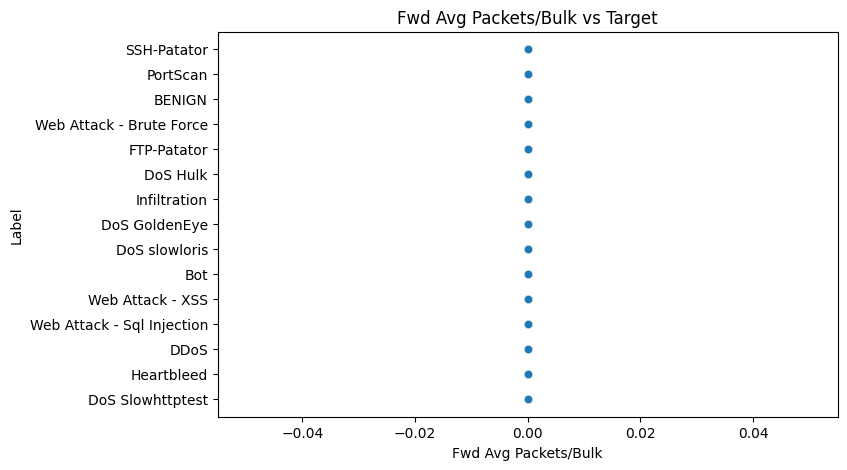

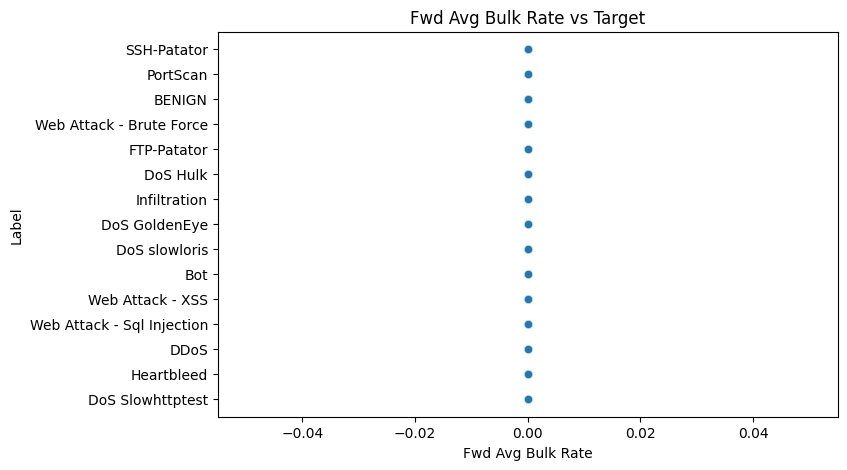

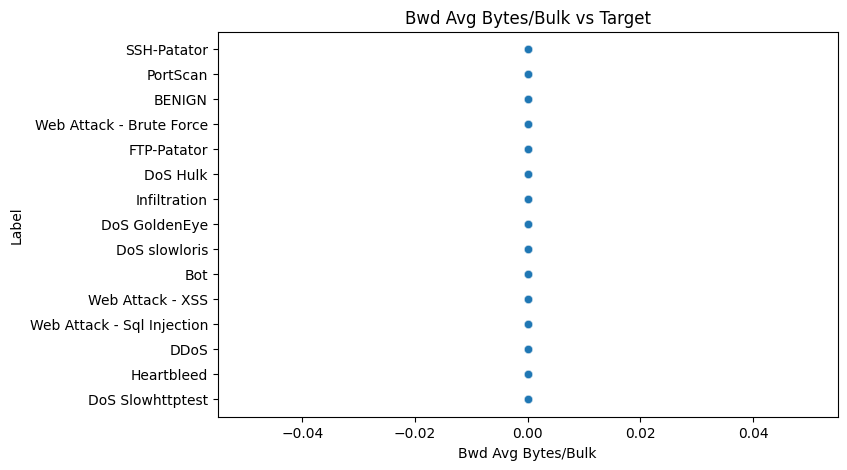

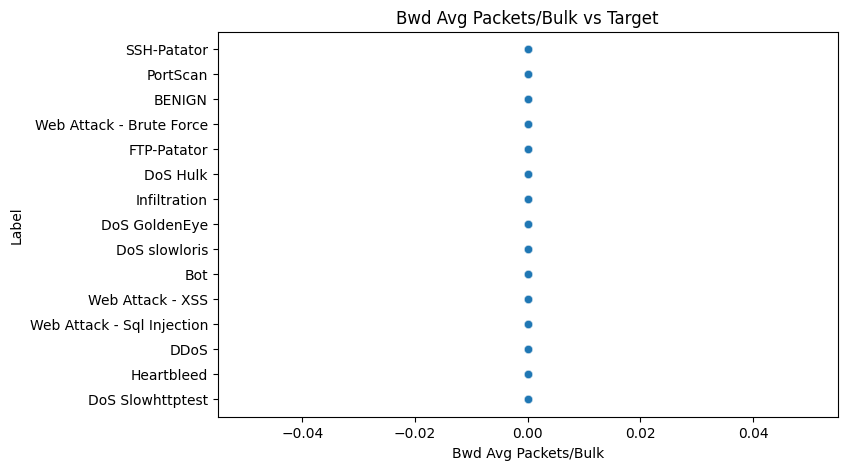

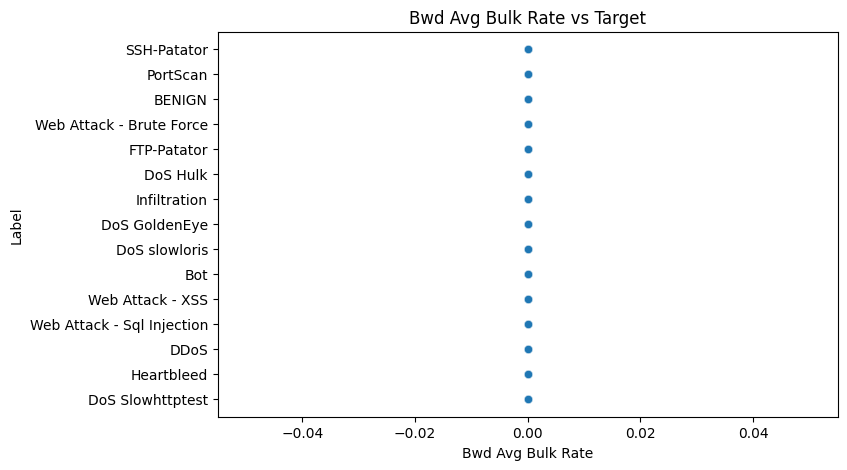

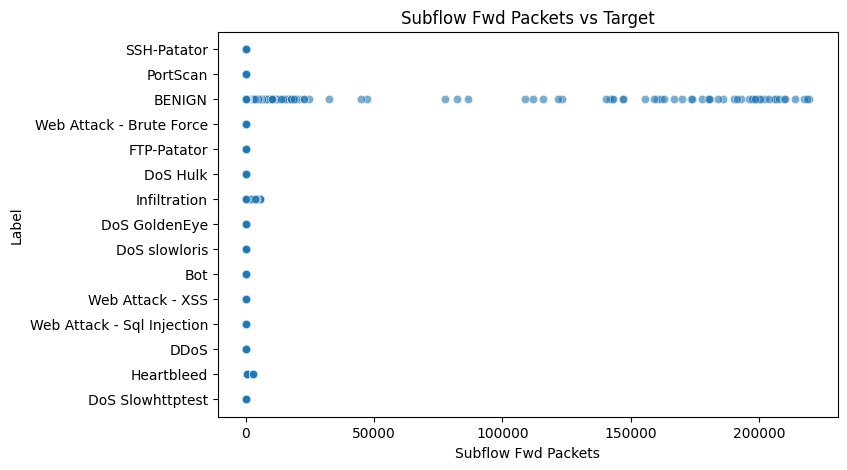

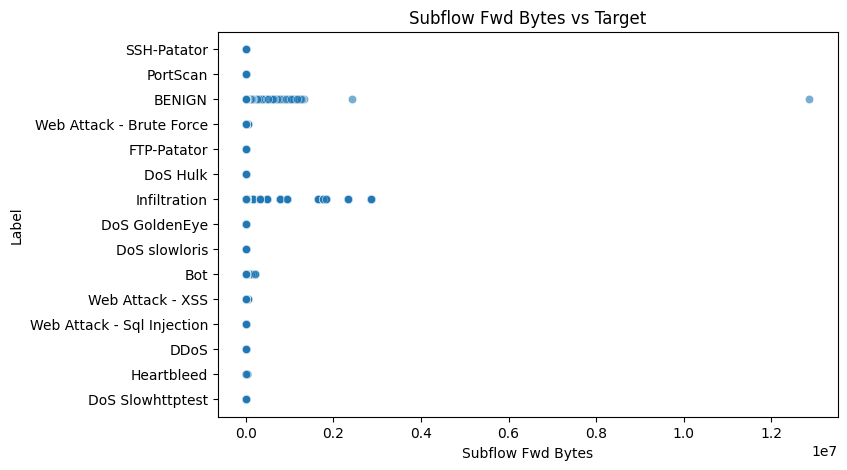

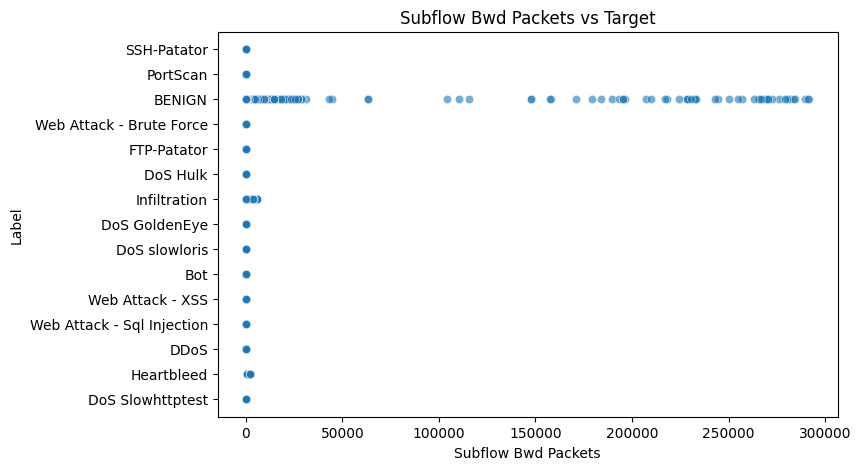

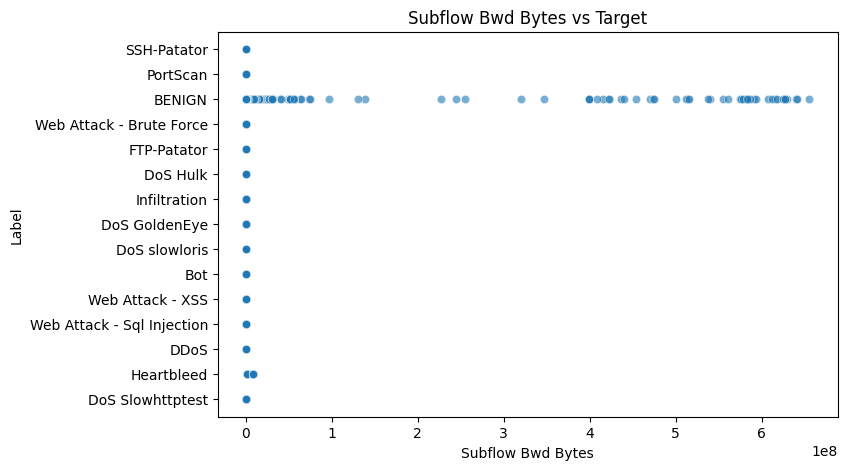

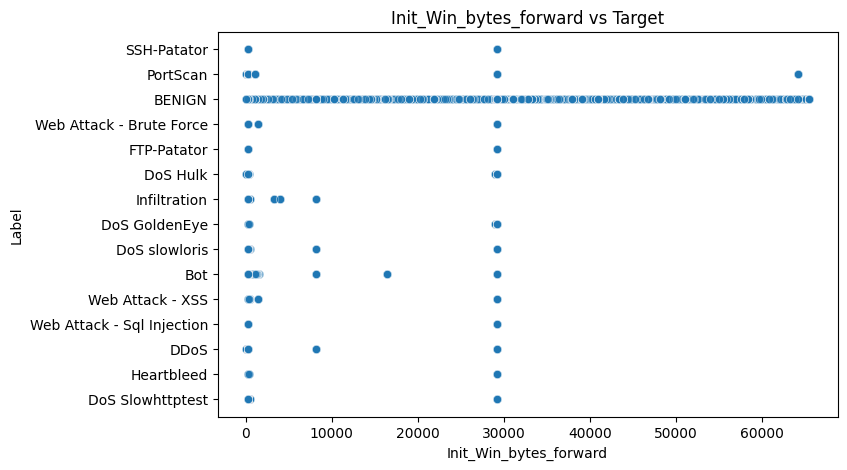

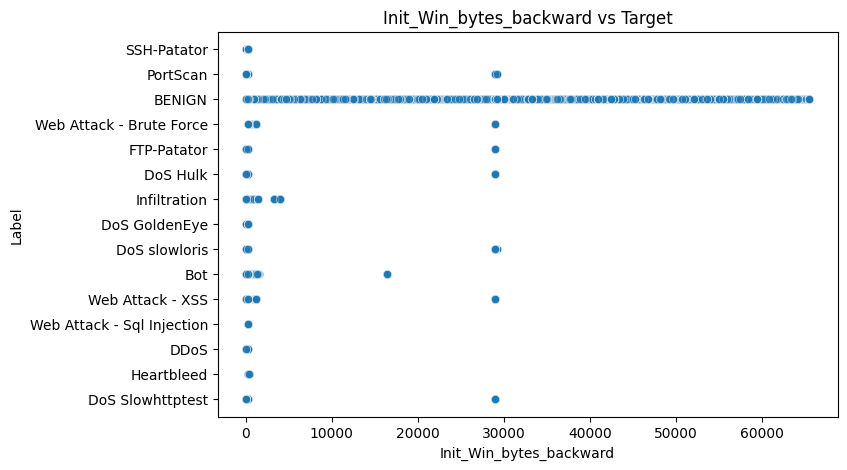

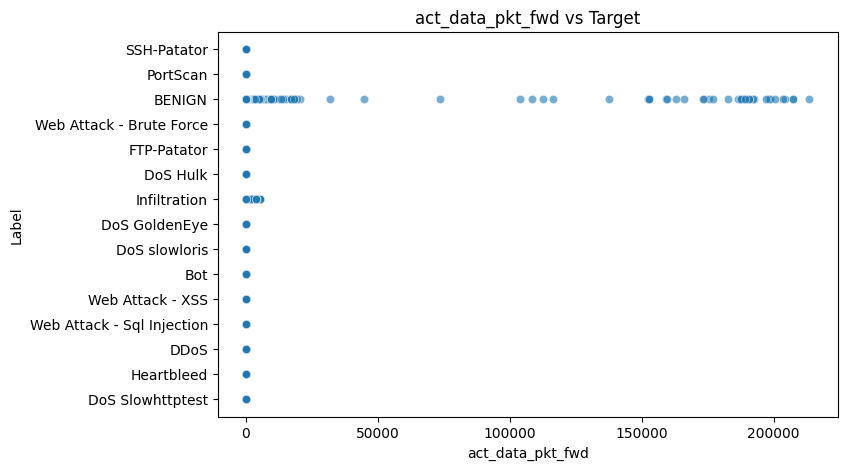

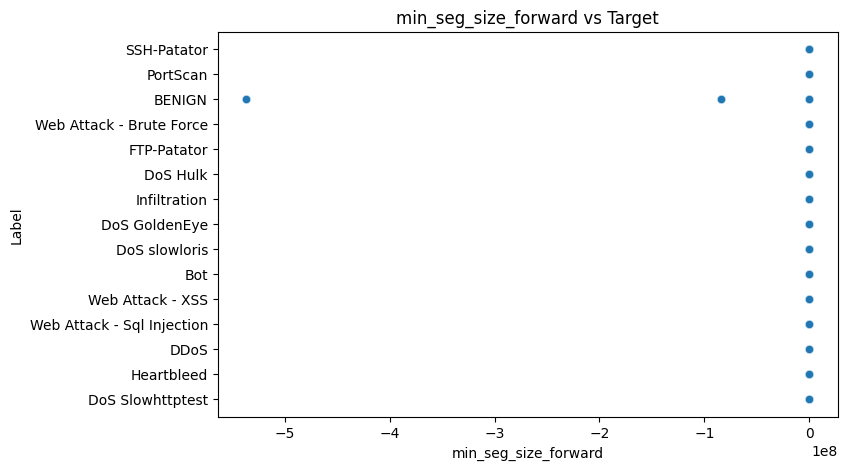

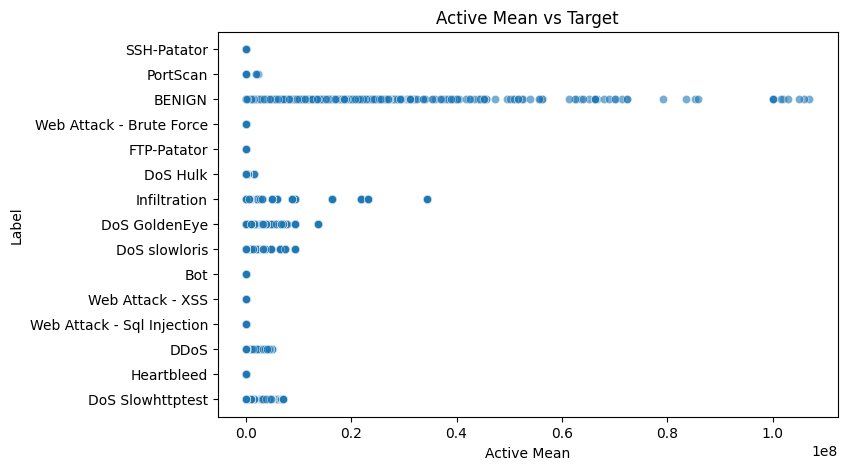

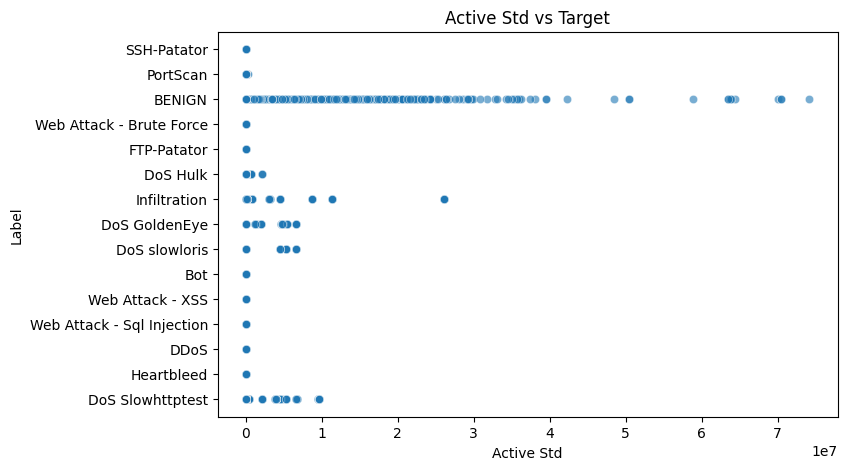

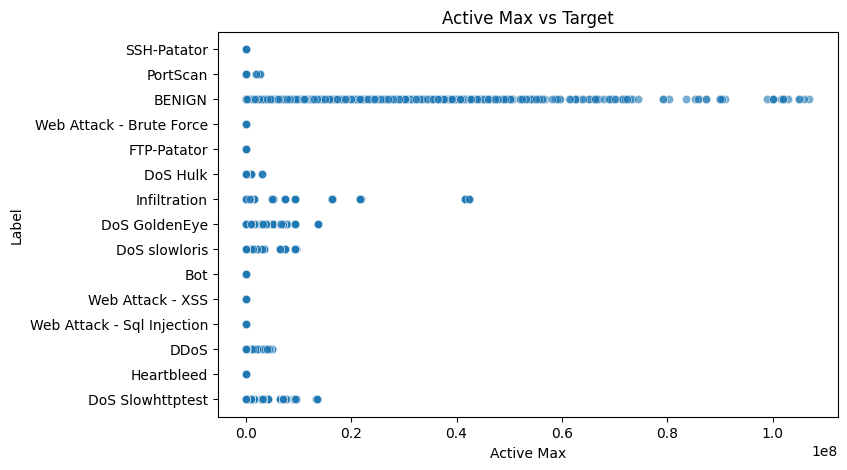

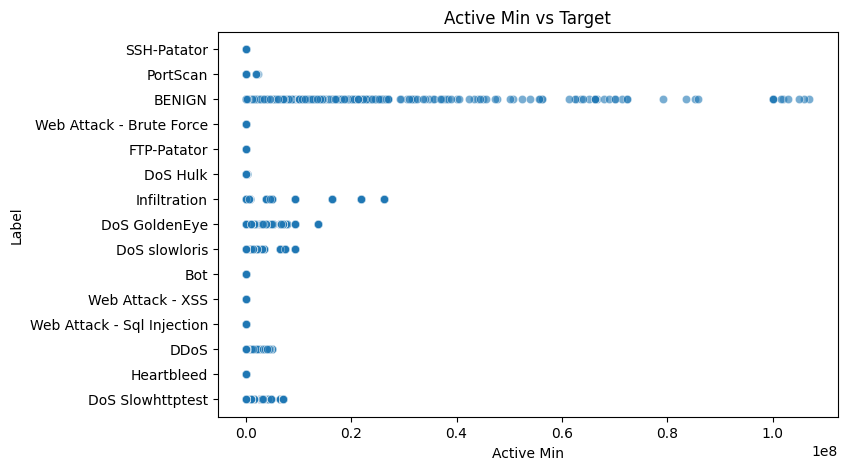

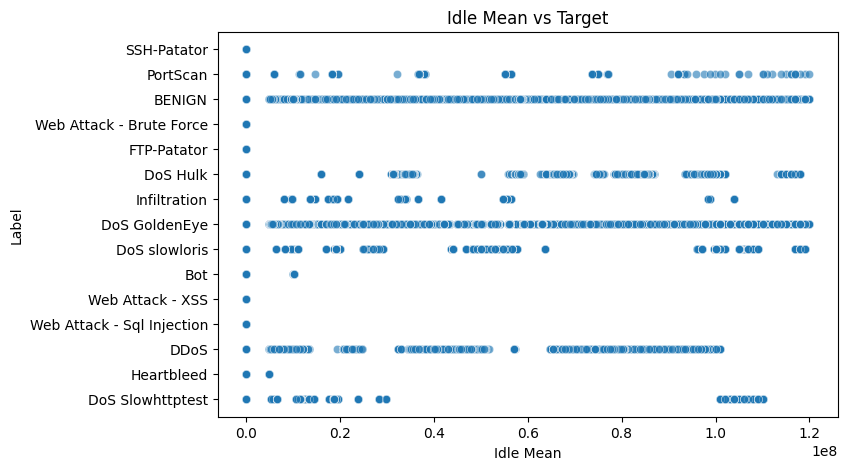

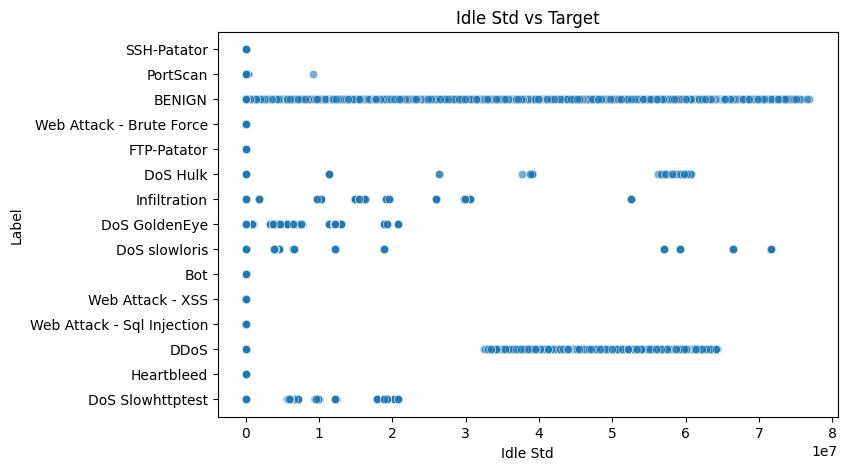

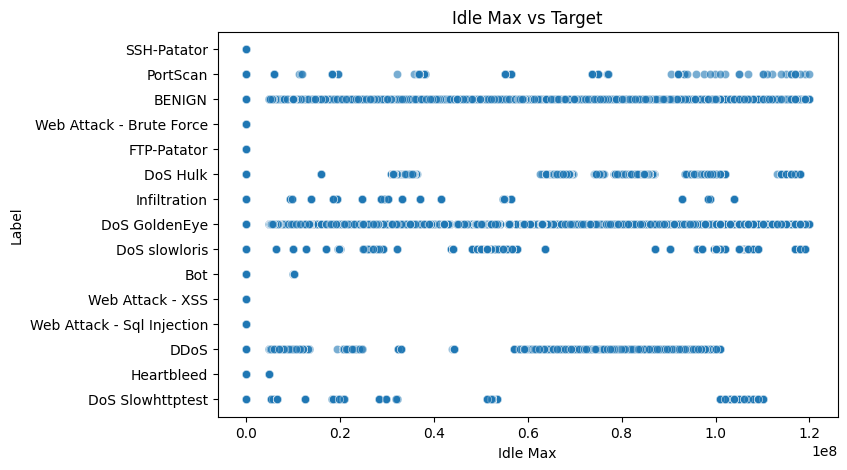

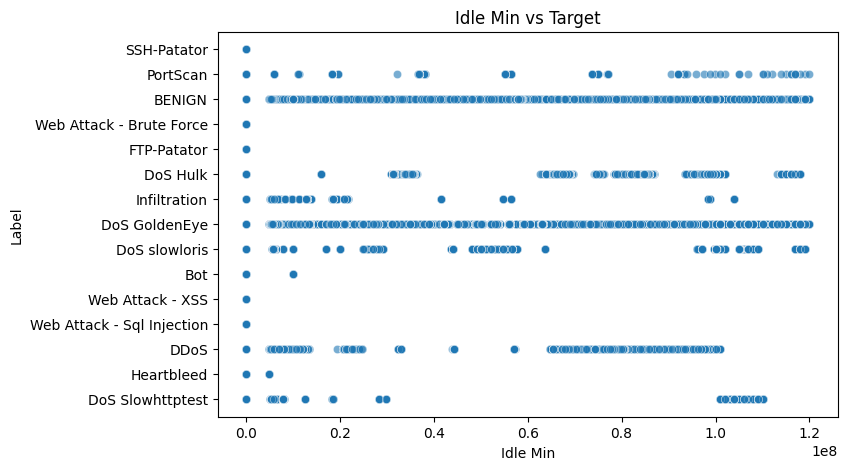

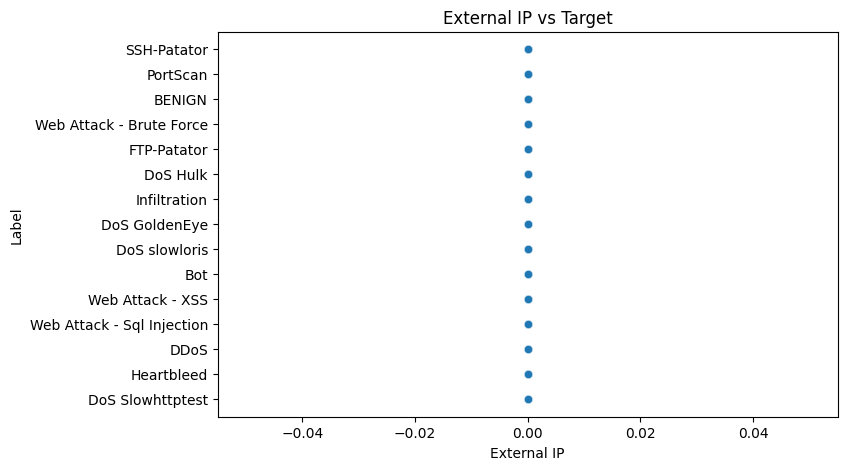

In [5]:
# 11. Feature Relationships with Target (if applicable)
if 'Label' in df.columns:
    print("\n===== Feature Relationships with Target =====")
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if col != 'target_column':
            plt.figure(figsize=(8, 5))
            sns.scatterplot(data=df, x=col, y='Label', alpha=0.6)
            plt.title(f"{col} vs Target")
            plt.show()

<Axes: xlabel='Label'>

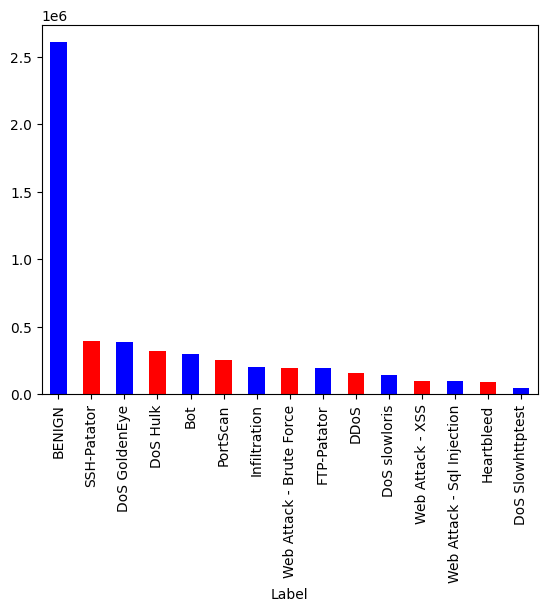

In [6]:
df["Label"].value_counts().plot(kind='bar', color=['blue', 'red'])

In [7]:
# Assuming df is your DataFrame and 'Label' is the column with labels
label_counts = df['Label'].value_counts()

# Exclude 'BENIGN' to find the maximum count of other labels
other_labels_counts = label_counts.drop('BENIGN')
max_other_count = other_labels_counts.max()

# Get the count of 'BENIGN' samples
benign_count = label_counts['BENIGN']

# Calculate the excess BENIGN samples
excess_benign = benign_count - max_other_count

print(f"Number of excess BENIGN samples: {excess_benign}")

Number of excess BENIGN samples: 2213619


In [8]:
label_counts["DoS Slowhttptest"]

np.int64(46823)

In [9]:
import pandas as pd

# Assuming df is your DataFrame and 'Label' is the column with labels
target_count = 46823  # The count of the lowest label

# Group the DataFrame by the 'Label' column
grouped = df.groupby('Label')

# Downsample each label to the target count
balanced_df = grouped.apply(lambda x: x.sample(min(len(x), target_count))).reset_index(drop=True)

# Verify the new distribution
print(balanced_df['Label'].value_counts())

C:\Users\Pratham\AppData\Local\Temp\ipykernel_23724\2534753656.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(lambda x: x.sample(min(len(x), target_count))).reset_index(drop=True)


Label
BENIGN                        46823
Bot                           46823
DDoS                          46823
DoS GoldenEye                 46823
DoS Hulk                      46823
DoS Slowhttptest              46823
DoS slowloris                 46823
FTP-Patator                   46823
Heartbleed                    46823
Infiltration                  46823
PortScan                      46823
SSH-Patator                   46823
Web Attack - Brute Force      46823
Web Attack - Sql Injection    46823
Web Attack - XSS              46823
Name: count, dtype: int64


In [10]:
balanced_df.to_csv('./BalancedDataset/finalUnderOfOverSampledBalanced.csv', index=False)

<Axes: xlabel='Label'>

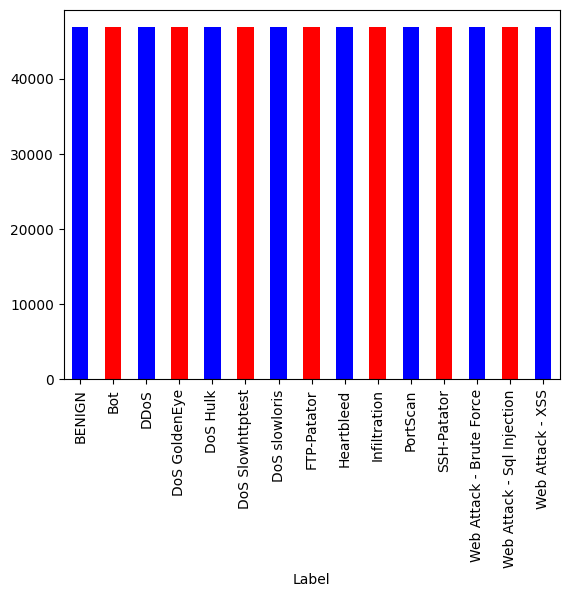

In [11]:
balanced_df['Label'].value_counts().plot(kind='bar', color=['blue', 'red'])

In [1]:
# LabelEncoding on this new dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
df = pd.read_csv('./BalancedDataset/finalUnderOfOverSampledBalanced.csv')

# Check the unique values in the target column before encoding
print("Unique values in the target column before encoding:")
print(df['Label'].unique())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the target column
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Check the unique values in the target column after encoding
print("\nUnique values in the target column after encoding:")
print(df['Label_Encoded'].unique())

# Display the mapping of original labels to encoded values
print("\nLabel Encoding Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Save the updated dataset (optional)
df.to_csv('./BalancedDataset/finalLabelled.csv', index=False)
print("\nDataset with label encoding saved as './BalancedDataset/finalLabelled.csv' ")

Unique values in the target column before encoding:
['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack - Brute Force' 'Web Attack - Sql Injection'
 'Web Attack - XSS']

Unique values in the target column after encoding:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Label Encoding Mapping:
BENIGN -> 0
Bot -> 1
DDoS -> 2
DoS GoldenEye -> 3
DoS Hulk -> 4
DoS Slowhttptest -> 5
DoS slowloris -> 6
FTP-Patator -> 7
Heartbleed -> 8
Infiltration -> 9
PortScan -> 10
SSH-Patator -> 11
Web Attack - Brute Force -> 12
Web Attack - Sql Injection -> 13
Web Attack - XSS -> 14

Dataset with label encoding saved as './BalancedDataset/finalLabelled.csv' 
